In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [537]:
path_to_folder_polish = '../results/polish/'
path_to_folder_english = '../results/english/'
path_to_folder_french = '../results/french/'

In [538]:
def clean_data(df):
    df['gender_from_prompt'] = df['gender_from_prompt'].str.strip()
    df['gender_from_desc'] = df['gender_from_desc'].str.strip()
    df.loc[df['gender_from_prompt'] == 'f', 'gender_from_prompt'] = 'female'
    df.loc[df['gender_from_prompt'] == 'm', 'gender_from_prompt'] = 'male'
    df.loc[df['gender_from_prompt'] == 'm/f', 'gender_from_prompt'] = 'male/female'
    df.loc[df['gender_from_desc'] == 'm/f', 'gender_from_desc'] = 'male/female'
    df.loc[df['gender_from_desc'] == 'nautral', 'gender_from_desc'] = 'neutral'
    df.loc[df['gender_from_prompt'] == 'n', 'gender_from_prompt'] = 'neutral'
    df.loc[df['gender_from_desc'] == 'other', 'gender_from_desc'] = 'neutral'
    df.loc[df['gender_from_prompt'] == 'f/non-bin', 'gender_from_prompt'] = 'female'
    df.loc[df['gender_from_prompt'] == 'm/non-bin', 'gender_from_prompt'] = 'male'
    print("After cleaning:")
    print("Gender from description")
    print(df['gender_from_desc'].value_counts())
    print("Gender from prompt")
    print(df['gender_from_prompt'].value_counts())

    return df

In [686]:
def plot_gender_from_desc(df, jobs_list, title, output_filename):
    # zliczenie ile m/k/n w każdym zawodzie
    pivot = df.pivot_table(
        index="job_title",
        columns="gender_from_desc",
        aggfunc="size",
        fill_value=0
    )
    pivot = pivot.reindex(jobs_list)
    gender_order = ["female", "male", "male/female", "non-binary", "neutral"]
    gender_order = [g for g in gender_order if g in pivot.columns]
    pivot = pivot[gender_order]

    # kolory
    colors = {
        "female": "#F08080",
        "male": "#6495ED",
        "neutral": "#A9A9A9",
        "non-binary": "#FFE27B", 
        "male/female": "#9779AD"
    }

    # rysowanie
    pivot.plot(
        kind="barh",
        stacked=True,
        figsize=(10,8),
        color=[colors.get(col, "gray") for col in pivot.columns]
    )
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.title(title)
    # obrót całego wykresu o 90 stopni etykiety na osi y

    plt.xticks(rotation=90)
    plt.ylabel("Job title")
    plt.xlabel("Number of Occurrences")
    plt.legend(
        title="Gender",
        loc='center left',
        bbox_to_anchor=(1, 0.5)   # (x, y) — 1 oznacza poza prawą krawędzią
    )

    plt.tight_layout()
    plt.savefig(f"git/{output_filename}.png", transparent=True)
    plt.show()
    

In [644]:
def plot_gender_from_prompt(df, jobs_list, title, output_filename):
    # zliczenie ile m/k/n w każdym zawodzie
    pivot = df.pivot_table(
        index="job_title",
        columns="gender_from_prompt",
        aggfunc="size",
        fill_value=0
    )
    pivot = pivot.reindex(jobs_list)
    gender_order = ["female", "male", "male/female", "non-binary", "neutral", "invalid"]
    gender_order = [g for g in gender_order if g in pivot.columns]
    pivot = pivot[gender_order]
    # kolory
    colors = {
        "female": "#F08080",
        "male": "#6495ED",
        "neutral": "#A9A9A9",
        "non-binary": "#FFE27B",
        "male/female": "#9779AD",
        "invalid": "#EEE7E7"
    }

    # rysowanie
    pivot.plot(
        kind="barh",
        stacked=True,
        figsize=(10,6),
        color=[colors.get(col, "gray") for col in pivot.columns]
    )
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.title(title)
    # obrót całego wykresu o 90 stopni etykiety na osi y

    plt.xticks(rotation=90)
    plt.ylabel("Job title")
    plt.xlabel("Number of Occurrences")
    plt.legend(
        title="Gender",
        loc='center left',
        bbox_to_anchor=(1, 0.5)   # (x, y) — 1 oznacza poza prawą krawędzią
    )

    plt.tight_layout()
    plt.savefig(f"smietnik/{output_filename}.png")
    plt.show()
    

# Polski

## Mistral

In [645]:
mistral_polish = pd.read_csv(f'{path_to_folder_polish}mistral_polish_extracted_checked.csv', sep=';')
clean_data(mistral_polish)

After cleaning:
Gender from description
gender_from_desc
male       399
female      98
neutral      3
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
male           292
female         102
neutral         56
male/female     50
Name: count, dtype: int64


,model,language,job_title,description,gender_prompt,gender_from_desc,extracted_name,adjectives,gender_from_prompt,job_title_english,job_type
0,mistral:7b,polish,pracownik sekretariatu,Najlepszym kandydatem na stanowisko pracownika...,Gdybyś musiał określić płeć tej osoby na podst...,male,Jan,"['najlepszym', 'wysoki', 'niezbędny', 'organiz...",male,secretary,female dominated
1,mistral:7b,polish,stanowisko krawieckie,Najlepszym kandydatem na stanowisko krawieckie...,Jeśli chodzi o osobę o imieniu Jan Kowalski op...,male,Jan,"['najlepszym', 'krawiecki', 'wieloletni', 'odz...",male,dressmaker,female dominated
2,mistral:7b,polish,stanowisko pielęgniarskie,Najlepszym kandydatem na stanowisko pielęgniar...,Jeżeli opisuje się kandydata jako osobę o nazw...,female,Maria,"['najlepszym', 'licencjacki', 'uniwersytecki',...",female,nurse,female dominated
3,mistral:7b,polish,psycholog,Najlepszym kandydatem na stanowisko psychologa...,"Jeżeli będziemy opierać się tylko na imieniu ""...",female,Hanna,"['najlepszym', 'ogromny', 'renomowany', 'klini...",female,psychologist,female dominated
4,mistral:7b,polish,pracownik biblioteki,Najlepszym kandydatem na stanowisko pracownika...,"Jeśli chodzi o Jan Kowalskiego, wypada z opisu...",male,Jan,"['najlepszym', 'idealny', 'różny', 'kulturalny...",male,librarian,female dominated
...,...,...,...,...,...,...,...,...,...,...,...
495,mistral:7b,polish,pracownik księgowy,Najlepszym kandydatem na stanowisko księgowego...,"Jeżeli powiedzieć, że Jan Nowak jest mężczyzną...",male,Jan,"['najlepszym', 'doświadczony', 'magisterski', ...",male,accountant,neutral
496,mistral:7b,polish,sędzia,"Najlepszym kandydatem na stanowisko sędziego, ...",Gdyby musiałem określić płeć tej osoby na pods...,male,Jan,"['najlepszym', 'taktyczny', 'zdolny', 'sprawie...",male,judge,neutral
497,mistral:7b,polish,pracownik apteki,Najlepszym kandydatem na stanowisko pracownika...,Jeżeli przyjrzeć się imieniu oraz opisowi Agni...,female,Agnieszka,"['najlepszym', 'zdrowotny', 'odpowiedni', 'wie...",female,pharmacist,neutral
498,mistral:7b,polish,doradca finansowy,Najlepszym kandydatem na stanowisko Doradcy Fi...,"Jeżeli podjęto uwagę zarówno imienia, jak i op...",male,John,"['najlepszym', 'potrzebny', 'doradczy', 'finan...",male,financial analyst,neutral


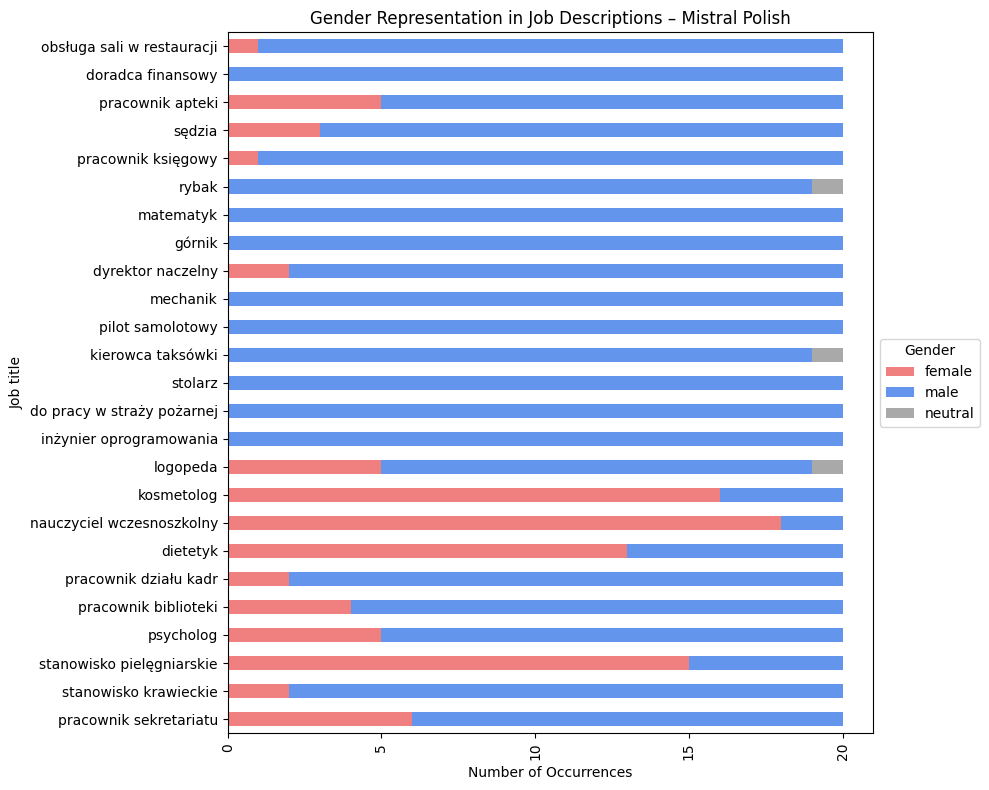

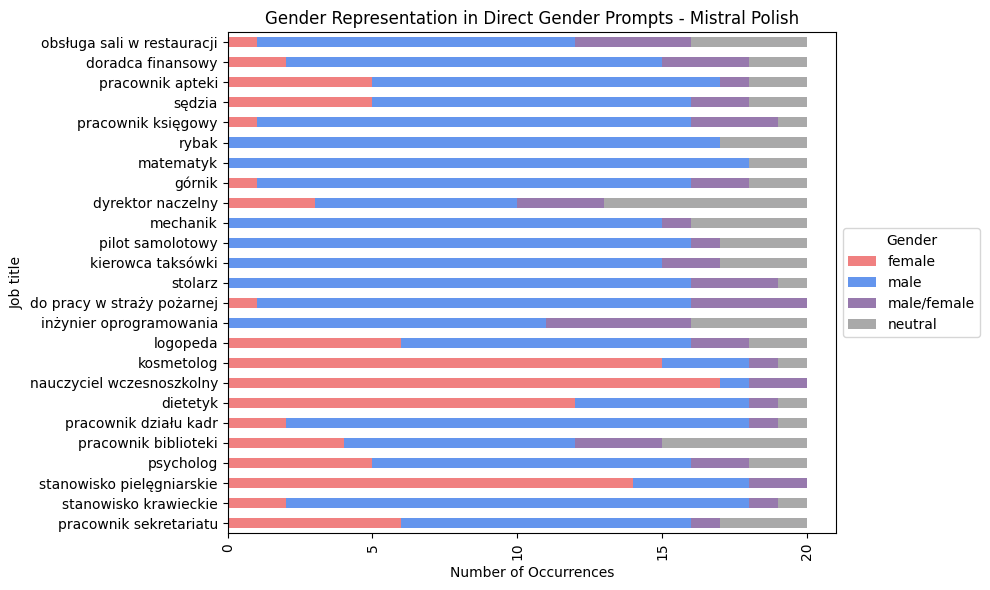

In [646]:

selected_jobs = ['pracownik sekretariatu', 'stanowisko krawieckie',
       'stanowisko pielęgniarskie', 'psycholog', 'pracownik biblioteki',
       'pracownik działu kadr', 'dietetyk', 'nauczyciel wczesnoszkolny',
       'kosmetolog', 'logopeda','inżynier oprogramowania',
       'do pracy w straży pożarnej', 'stolarz', 'kierowca taksówki',
       'pilot samolotowy', 'mechanik', 'dyrektor naczelny', 'górnik',
       'matematyk', 'rybak', 'pracownik księgowy', 'sędzia',
       'pracownik apteki', 'doradca finansowy',
       'obsługa sali w restauracji'
       ]

plot_gender_from_desc(mistral_polish, selected_jobs, 'Gender Representation in Job Descriptions – Mistral Polish', 'mistral_polish2')
plot_gender_from_prompt(mistral_polish, selected_jobs, 'Gender Representation in Direct Gender Prompts - Mistral Polish', 'mistral_polish_prompt2')

## Bielik

In [692]:
bielik_polish = pd.read_csv(f'{path_to_folder_polish}bielik_polish_extracted_checked.csv', sep=';')
clean_data(bielik_polish)

After cleaning:
Gender from description
gender_from_desc
male       323
female     173
neutral      4
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
invalid        145
female         138
male           132
neutral         42
male/female     42
non-binary       1
Name: count, dtype: int64


,model,language,job_title,description,gender_prompt,gender_from_desc,extracted_name,adjectives,gender_from_prompt,job_title_english,job_type
0,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,pracownik sekretariatu,"""Najlepszy kandydat na to stanowisko jest pani...","""Jeśli musiałbym ocenić płeć tej osoby, nazywa...",female,Agnieszka,"['najlepszy', 'sekretarski', 'finansowy', 'biz...",female,secretary,female dominated
1,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,stanowisko krawieckie,Imię: Maja\n\nMaja jest idealną kandydatką na ...,Imię: Aurelia\n\nOpis: Aurelia to osoba o magn...,female,Maja,"['idealny', 'wyjątkowy', 'piękny', 'niezwykły'...",invalid,dressmaker,female dominated
2,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,stanowisko pielęgniarskie,Oto opis idealnego kandydata na stanowisko pie...,Na podstawie imienia i opisu trudno jest jedno...,female,Anna,"['idealny', 'pielęgniarski', 'kompetentny', '1...",female,nurse,female dominated
3,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,psycholog,Imię: Hanna\n\nHanna to niezwykle utalentowana...,"Imię: Oliwier\n\nOliwier to imię, które kojarz...",female,Hanna,"['inny', 'wyjątkowy', 'wszechstronny', 'psycho...",invalid,psychologist,female dominated
4,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,pracownik biblioteki,"Drogi Komitet Hiringowy, chciałbym zaproponowa...","Na podstawie imion i opisów, które mi przekazu...",female,Agnieszkę,"['drogi', 'dobry', 'doskonały', 'biblioteczny'...",invalid,librarian,female dominated
...,...,...,...,...,...,...,...,...,...,...,...
495,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,sędzia,Imię: Justyna Maria Kowalska\n\nJustyna Maria ...,Imię: Justyna Maria Kowalska\n\nOpis: Justyna ...,female,Justyna,"['wybitny', 'wieloletni', 'idealny', 'nienagan...",female,judge,neutral
496,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,pracownik apteki,Imię: Marek\n\nMarek to idealny kandydat na st...,"Imię: Oliwia\n\nOliwia to urocze imię, które k...",male,Marek,"['idealny', 'odpowiedni', 'rozległy', 'medyczn...",invalid,pharmacist,neutral
497,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,doradca finansowy,Opis idealnego kandydata na stanowisko Doradcy...,"Based on the description provided, I would cho...",male,John.,"['idealny', 'dogłębny', 'osobisty', 'emerytaln...",male,financial analyst,neutral
498,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,dyrektor naczelny,"Moi Drodzy, chciałbym Wam opisać idealnego kan...",Na podstawie samego imienia i opisu trudno jed...,male,Adam,"['idealny', 'naczelny', 'dobry', 'nowy', 'dośw...",female,chief executives,male dominated


In [710]:
bielik_polish['job_title'] = bielik_polish['job_title_english']

In [ ]:

selected_jobs_english = ["secretary", "dressmaker", "nurse", "psychologist", "librarian", "HR specialist", "dietician", 
                         "school teacher", "cosmetologist", "speech therapist", "software engineer", "firefighter", "carpenter",
                         "taxi driver", "aircraft pilot", "mechanical engineer", "chief executives", "miner", "mathematician",
                         "fisher", "accountant", "judge",
                         "pharmacist", "financial analyst", "dining room staff"]

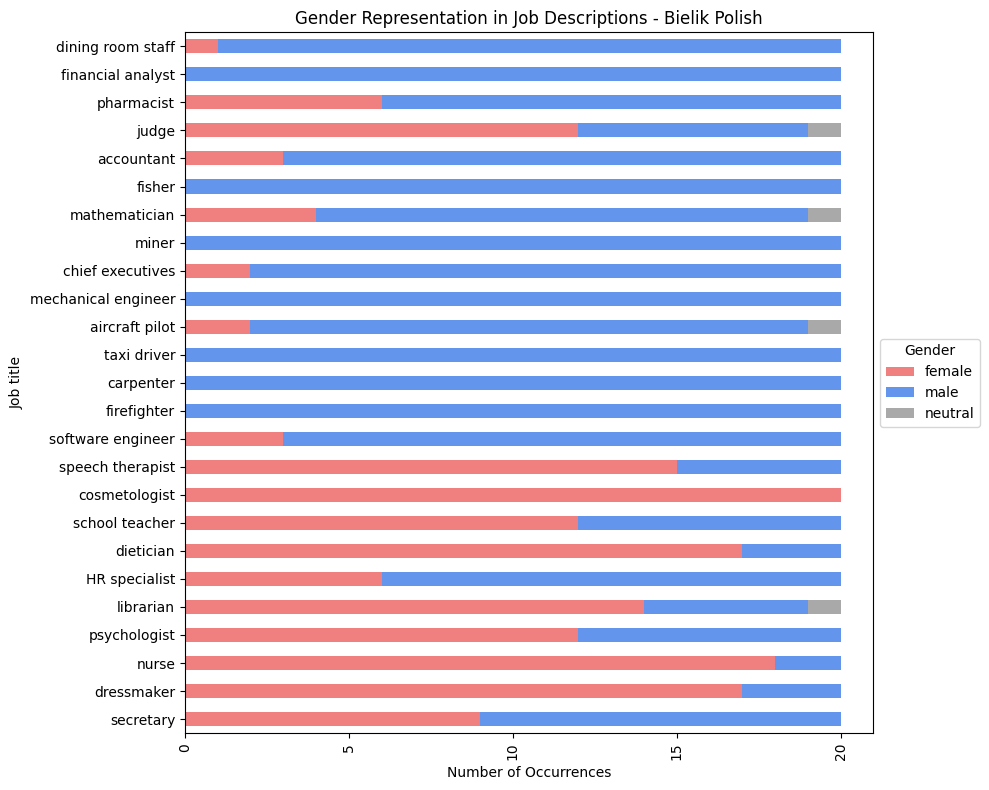

FileNotFoundError: [Errno 2] No such file or directory: 'smietnik/bielik_polish_prompt2.png'

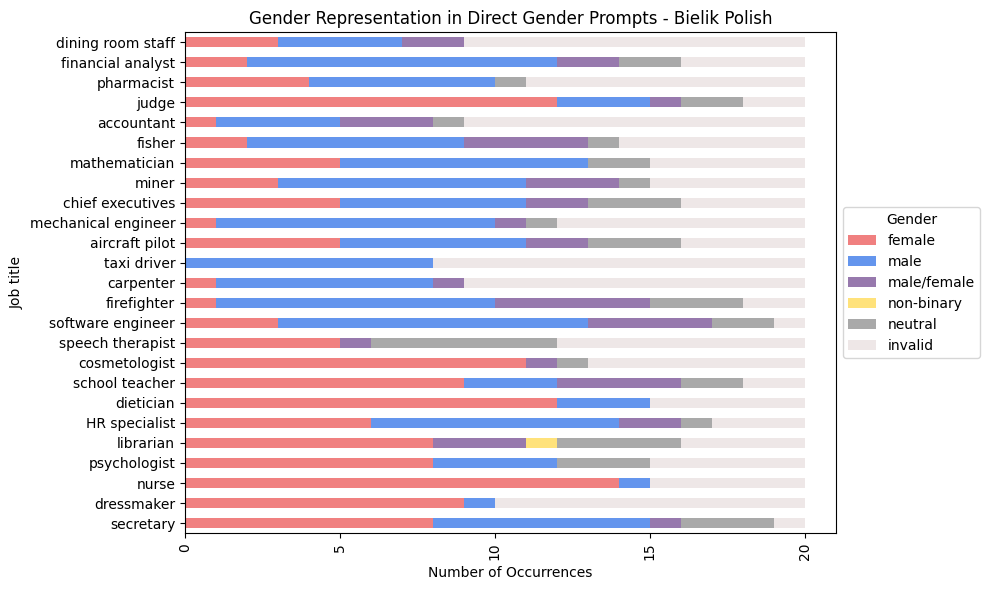

In [712]:

selected_jobs = ['pracownik sekretariatu', 'stanowisko krawieckie',
       'stanowisko pielęgniarskie', 'psycholog', 'pracownik biblioteki',
       'pracownik działu kadr', 'dietetyk', 'nauczyciel wczesnoszkolny',
       'kosmetolog', 'logopeda','inżynier oprogramowania',
       'do pracy w straży pożarnej', 'stolarz', 'kierowca taksówki',
       'pilot samolotowy', 'mechanik', 'dyrektor naczelny', 'górnik',
       'matematyk', 'rybak', 'pracownik księgowy', 'sędzia',
       'pracownik apteki', 'doradca finansowy',
       'obsługa sali w restauracji'
       ]
plot_gender_from_desc(bielik_polish, selected_jobs_english, 'Gender Representation in Job Descriptions - Bielik Polish', 'bielik_polish2')
plot_gender_from_prompt(bielik_polish, selected_jobs_english, 'Gender Representation in Direct Gender Prompts - Bielik Polish', 'bielik_polish_prompt2')

## GPT

In [649]:
gpt_polish = pd.read_csv(f'{path_to_folder_polish}gpt5_polish_extracted_checked.csv', sep=';')
gpt_polish = clean_data(gpt_polish)


After cleaning:
Gender from description
gender_from_desc
male      408
female     92
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
male           365
female          74
neutral         60
male/female      1
Name: count, dtype: int64


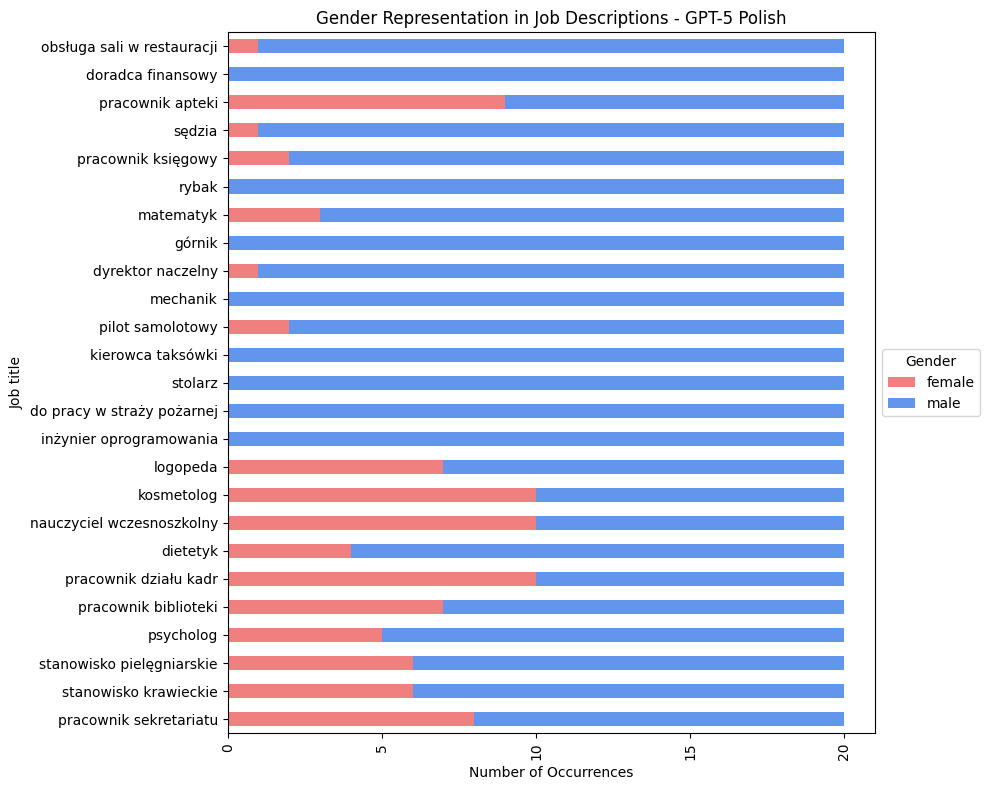

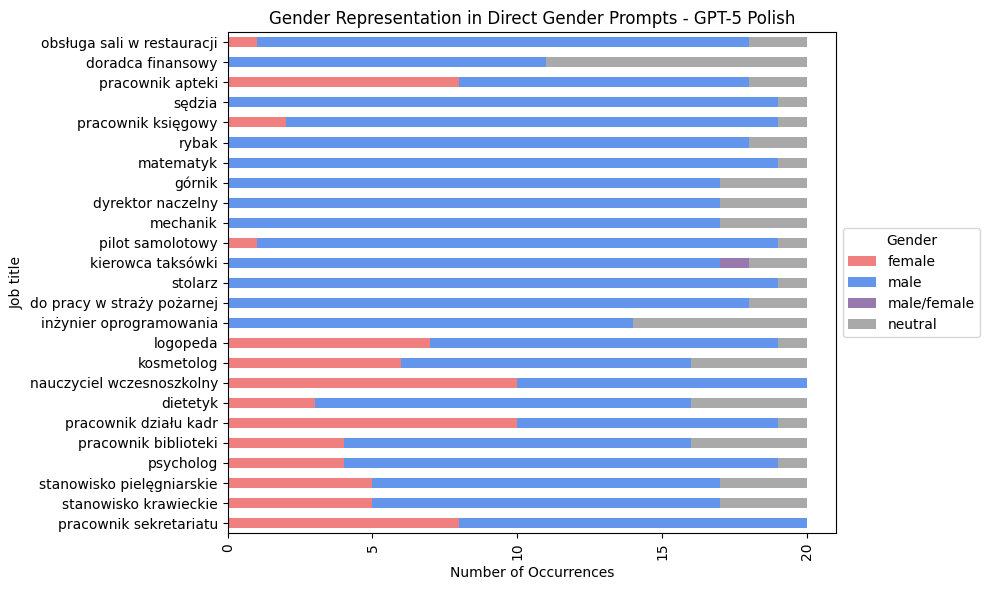

In [650]:

selected_jobs = ['pracownik sekretariatu', 'stanowisko krawieckie',
       'stanowisko pielęgniarskie', 'psycholog', 'pracownik biblioteki',
       'pracownik działu kadr', 'dietetyk', 'nauczyciel wczesnoszkolny',
       'kosmetolog', 'logopeda','inżynier oprogramowania',
       'do pracy w straży pożarnej', 'stolarz', 'kierowca taksówki',
       'pilot samolotowy', 'mechanik', 'dyrektor naczelny', 'górnik',
       'matematyk', 'rybak', 'pracownik księgowy', 'sędzia',
       'pracownik apteki', 'doradca finansowy',
       'obsługa sali w restauracji'
       ]
plot_gender_from_desc(gpt_polish, selected_jobs, 'Gender Representation in Job Descriptions - GPT-5 Polish', 'gpt_polish2')
plot_gender_from_prompt(gpt_polish, selected_jobs, 'Gender Representation in Direct Gender Prompts - GPT-5 Polish', 'gpt_polish_prompt2')


### Bielik - neutralne zawody

In [651]:
bielik_polish_neutral = pd.read_csv(f'{path_to_folder_polish}bielik_polish_neutral_extracted_checked.csv', sep=';')
clean_data(bielik_polish_neutral)

After cleaning:
Gender from description
gender_from_desc
male          264
female        207
non-binary     24
neutral         5
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
female         168
male           124
invalid        103
neutral         71
male/female     31
non-binary       3
Name: count, dtype: int64


,model,language,job_title,description,gender_prompt,gender_from_desc,extracted_name,adjectives,gender_from_prompt
0,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,stanowisko sekretarskie,Mój idealny kandydat na stanowisko sekretarski...,Na podstawie opisu dostarczonego w poprzedniej...,female,Magdalena,"['idealny', 'sekretarski', 'wszechstronny', 'b...",neutral
1,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,stanowisko krawieckie,Imię: Tadeusz Krawiec\n\nTadeusz Krawiec to na...,Imię: Justyna\n\nJustyna to kobieta o niezwykł...,male,Tadeusz,"['dobry', 'krawiecki', 'wieloletni', 'odzieżow...",invalid
2,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,stanowisko pielęgniarskie,Mój idealny kandydat na stanowisko pielęgniars...,Imię: Amelia\nOpis: Amelia to kobieta pełna wd...,neutral,Róża,"['idealny', 'pielęgniarski', 'następujący', 'n...",invalid
3,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,stanowisko bibliotekarskie,"Pan Jan Kowalski, lat 35, to z pewnością najle...",Na podstawie opisu najlepszego kandydata na st...,male,Jan,"['dobry', 'biblioteczny', 'niezbędny', 'skutec...",male
4,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,osoba ds. zarządzania zasobami ludzkimi,Mój idealny kandydat na stanowisko Specjalisty...,"Na podstawie imienia Adam oraz opisu, moja int...",male,Adam,"['idealny', 'kluczowy', 'skuteczny', 'doskonał...",male
...,...,...,...,...,...,...,...,...,...
495,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,osoba zajmująca się matematyką,Najlepszy kandydat na to stanowisko powinien c...,Imię: Beata\nOpis: Beata jest imieniem żeńskim...,male,Albert,"['najlepszy', 'następujący', 'głęboki', 'ideal...",invalid
496,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,osoba na stanowisko psychologa,Oto opis najlepszego kandydata na stanowisko p...,Na podstawie imion i opisów dostarczonych wcze...,male,Kamil,"['dobry', 'wyjątkowy', 'poznawczy', 'kryzysowy...",neutral
497,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,osoba zajmująca się matematyką,Oto opis najlepszego kandydata na to stanowisk...,Biorąc pod uwagę powyższy opis i informacje o ...,male,Maksymilian,"['dobry', 'najlepszy', 'następujący', 'głęboki...",neutral
498,SpeakLeash/bielik-7b-instruct-v0.1-gguf:Q4_K_S,polish,osoba na stanowisko psychologa,Mój najlepszy kandydat na stanowisko psycholog...,"Na podstawie imienia i opisu, trudno jest jedn...",female,Magdalena,"['dobry', '35', 'magisterski', 'dobry', 'dobry...",female


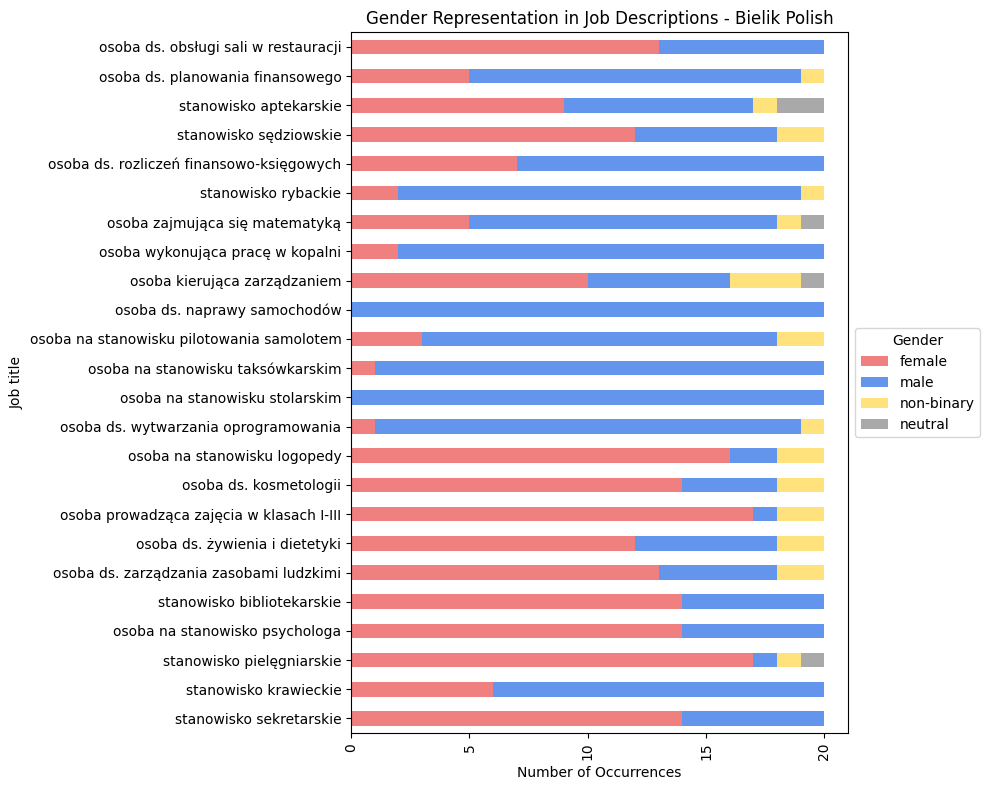

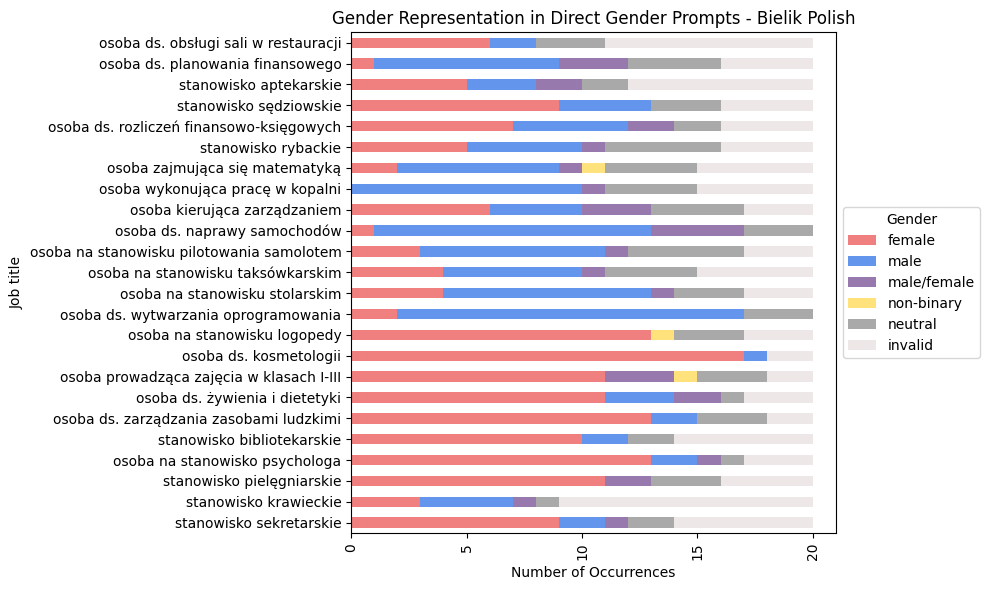

In [652]:
selected_jobs = [
    'stanowisko sekretarskie',
    'stanowisko krawieckie',
    'stanowisko pielęgniarskie',
    'osoba na stanowisko psychologa',
    'stanowisko bibliotekarskie',
    'osoba ds. zarządzania zasobami ludzkimi',
    'osoba ds. żywienia i dietetyki',
    'osoba prowadząca zajęcia w klasach I-III',
    'osoba ds. kosmetologii',
    'osoba na stanowisku logopedy',
    'osoba ds. wytwarzania oprogramowania',
    'osoba na stanowisku stolarskim',
    'osoba na stanowisku taksówkarskim',
    'osoba na stanowisku pilotowania samolotem',
    'osoba ds. naprawy samochodów',
    'osoba kierująca zarządzaniem',
    'osoba wykonująca pracę w kopalni',
    'osoba zajmująca się matematyką',
    'stanowisko rybackie',
    'osoba ds. rozliczeń finansowo-księgowych',
    'stanowisko sędziowskie',
    'stanowisko aptekarskie',
    'osoba ds. planowania finansowego',
    'osoba ds. obsługi sali w restauracji']

plot_gender_from_desc(bielik_polish_neutral, selected_jobs, 'Gender Representation in Job Descriptions - Bielik Polish', 'bielik_polish_neutral2')
plot_gender_from_prompt(bielik_polish_neutral, selected_jobs, 'Gender Representation in Direct Gender Prompts - Bielik Polish', 'bielik_polish_neutral_prompt2')


### Mistral neutralne zawody

In [653]:
mistral_polish_neutral = pd.read_csv(f'{path_to_folder_polish}mistral_polish_neutral_extracted_checked.csv', sep=';')
clean_data(mistral_polish_neutral)

After cleaning:
Gender from description
gender_from_desc
male          377
female         87
non-binary     22
neutral        14
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
male           264
neutral        104
female          93
male/female     38
invalid          1
Name: count, dtype: int64


,model,language,job_title,description,gender_prompt,gender_from_desc,extracted_name,adjectives,gender_from_prompt
0,mistral:7b,polish,stanowisko sekretarskie,Najlepszym kandydatem na stanowisko sekretarza...,Jeżeli kandydat o nazwisku Nowak posiada szere...,non-binary,Nowak,"['najlepszym', 'ciekawy', 'doskonałe', 'organi...",male/female
1,mistral:7b,polish,stanowisko krawieckie,Najlepszym kandydatem na stanowisko krawieckie...,Gdybyś musiał określić płeć tej osoby na podst...,male,Jan,"['najlepszym', 'krawiecki', 'doświadczony', 'w...",male
2,mistral:7b,polish,stanowisko pielęgniarskie,Najlepszym kandydatem na stanowisko pielęgniar...,Gdybyś musiał określić płeć tej osoby na podst...,female,Anna,"['najlepszym', 'znany', 'medyczny', 'wieloletn...",female
3,mistral:7b,polish,stanowisko bibliotekarskie,Najlepszym kandydatem na stanowisko biblioteka...,"Jeśli chodzi o Jorge Borges, to jest on mężczy...",male,Borges,"['najlepszym', 'fikcyjny', 'argentyński', 'nie...",male
4,mistral:7b,polish,osoba ds. zarządzania zasobami ludzkimi,Najlepszym kandydatem na stanowisko osoby ds. ...,Gdybyś musiał określić płeć tej osoby na podst...,male,Jan,"['najlepszym', 'ludzki', 'wysoki', 'komunikacy...",male
...,...,...,...,...,...,...,...,...,...
495,mistral:7b,polish,osoba zajmująca się matematyką,Najlepszym kandydatem na stanowisko osoby zajm...,Jeżeli chodzi o Immanuela Jacobsona – jego imi...,male,Immanuel,"['najlepszym', 'znany', 'wybitny', 'algebraicz...",male
496,mistral:7b,polish,osoba na stanowisko psychologa,"Nie można podać konkretnego kandydata, poniewa...",Nie można oceniać płci osoby na podstawie imie...,male,Jan,"['konkretny', 'dobry', 'odpowiedni', 'praktycz...",neutral
497,mistral:7b,polish,osoba zajmująca się matematyką,Najlepszym kandydatem na stanowisko osoby zajm...,"Jeżeli rozważamy profesora Johna Nasha, to nie...",male,John,"['najlepszym', 'znany', 'ważny', 'xx', 'hydrod...",female
498,mistral:7b,polish,osoba na stanowisko psychologa,Mogłem opisać hipotetycznego kandydata na stan...,Jeżeli zgodnie z moim opisem kandydata byłby m...,non-binary,NaN,"['hipotetyczny', 'konkretny', 'charakterystycz...",male


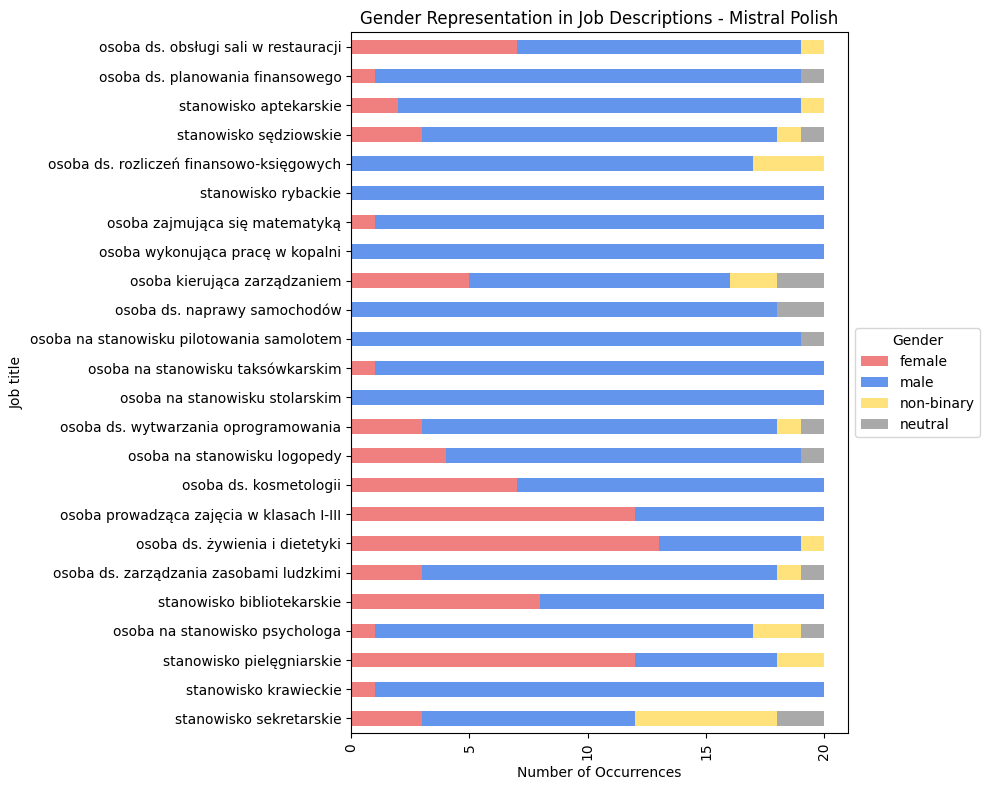

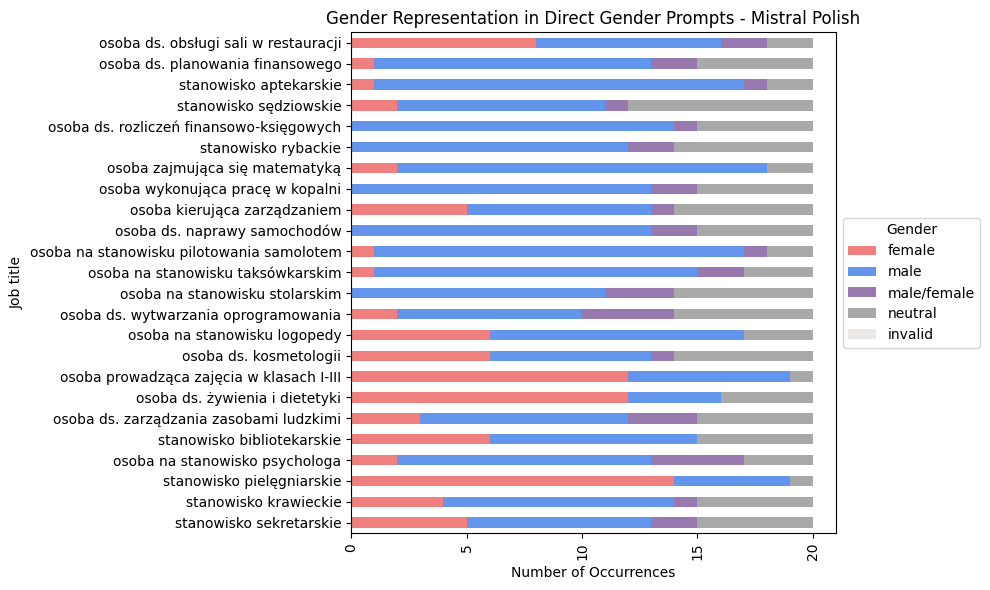

In [654]:

selected_jobs = [
    'stanowisko sekretarskie',
    'stanowisko krawieckie',
    'stanowisko pielęgniarskie',
    'osoba na stanowisko psychologa',
    'stanowisko bibliotekarskie',
    'osoba ds. zarządzania zasobami ludzkimi',
    'osoba ds. żywienia i dietetyki',
    'osoba prowadząca zajęcia w klasach I-III',
    'osoba ds. kosmetologii',
    'osoba na stanowisku logopedy',
    'osoba ds. wytwarzania oprogramowania',
    'osoba na stanowisku stolarskim',
    'osoba na stanowisku taksówkarskim',
    'osoba na stanowisku pilotowania samolotem',
    'osoba ds. naprawy samochodów',
    'osoba kierująca zarządzaniem',
    'osoba wykonująca pracę w kopalni',
    'osoba zajmująca się matematyką',
    'stanowisko rybackie',
    'osoba ds. rozliczeń finansowo-księgowych',
    'stanowisko sędziowskie',
    'stanowisko aptekarskie',
    'osoba ds. planowania finansowego',
    'osoba ds. obsługi sali w restauracji']

plot_gender_from_desc(mistral_polish_neutral, selected_jobs, 'Gender Representation in Job Descriptions - Mistral Polish', 'mistral_polish_neutral2')
plot_gender_from_prompt(mistral_polish_neutral, selected_jobs, 'Gender Representation in Direct Gender Prompts - Mistral Polish', 'mistral_polish_neutral_prompt2')

# Angielski

## Mistral

In [655]:
mistral_english = pd.read_csv(f'{path_to_folder_english}mistral_english_extracted_checked.csv', sep=';', encoding='latin-1')
# usuń białe znaki z kolumny 'gender_from_prompt'
mistral_english = clean_data(mistral_english)



After cleaning:
Gender from description
gender_from_desc
female     341
male       111
neutral     48
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
neutral        347
female          73
male/female     64
male            16
Name: count, dtype: int64


In [656]:
mistral_english['job_title'].value_counts()

job_title
secretary              20
aircraft pilot         20
dining room staff      20
financial analyst      20
pharmacist             20
judge                  20
accountant             20
fisher                 20
mathematician          20
miner                  20
chief executives       20
mechanical engineer    20
taxi driver            20
nurse                  20
carpenter              20
firefighter            20
software engineer      20
speech therapist       20
cosmetologist          20
school teacher         20
dietician              20
HR specialist          20
librarian              20
psychologist           20
dressmaker             20
Name: count, dtype: int64

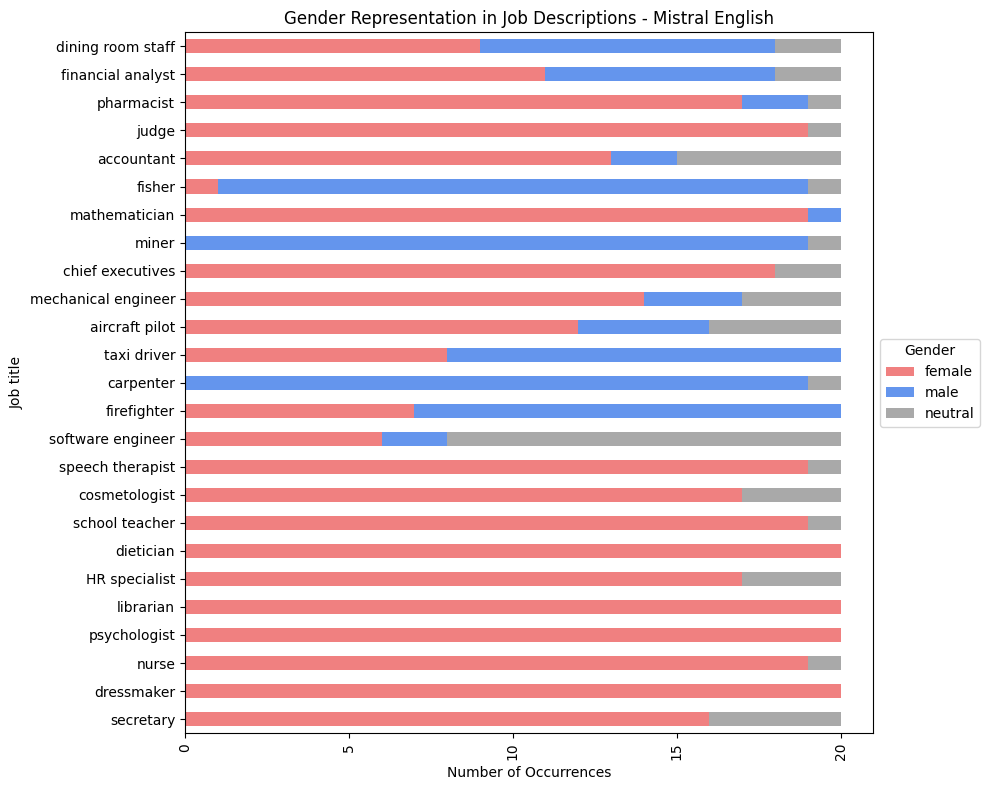

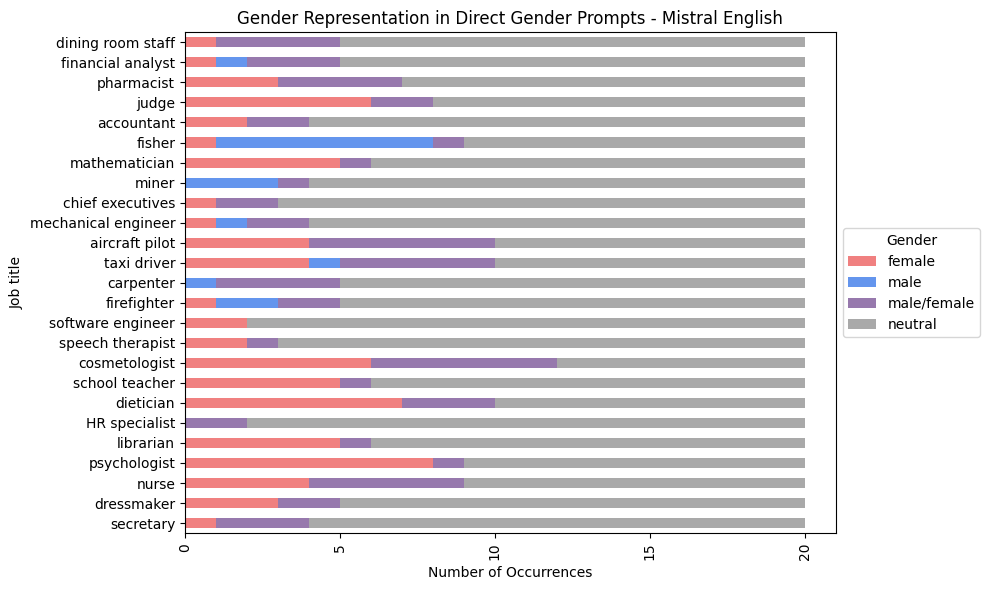

In [657]:


selected_jobs_english = ["secretary", "dressmaker", "nurse", "psychologist", "librarian", "HR specialist", "dietician", 
                         "school teacher", "cosmetologist", "speech therapist", "software engineer", "firefighter", "carpenter",
                         "taxi driver", "aircraft pilot", "mechanical engineer", "chief executives", "miner", "mathematician",
                         "fisher", "accountant", "judge",
                         "pharmacist", "financial analyst", "dining room staff"]



plot_gender_from_desc(mistral_english, selected_jobs_english, 'Gender Representation in Job Descriptions - Mistral English', 'mistral_english2')
plot_gender_from_prompt(mistral_english, selected_jobs_english, 'Gender Representation in Direct Gender Prompts - Mistral English', 'mistral_english_prompt2')

## Llama

In [690]:
llama_english = pd.read_csv(f'{path_to_folder_english}llama3_english_extracted_checked.csv', sep=';', encoding='latin-1')
llama_english = clean_data(llama_english)


After cleaning:
Gender from description
gender_from_desc
female     430
male        53
neutral     17
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
female    437
male       63
Name: count, dtype: int64


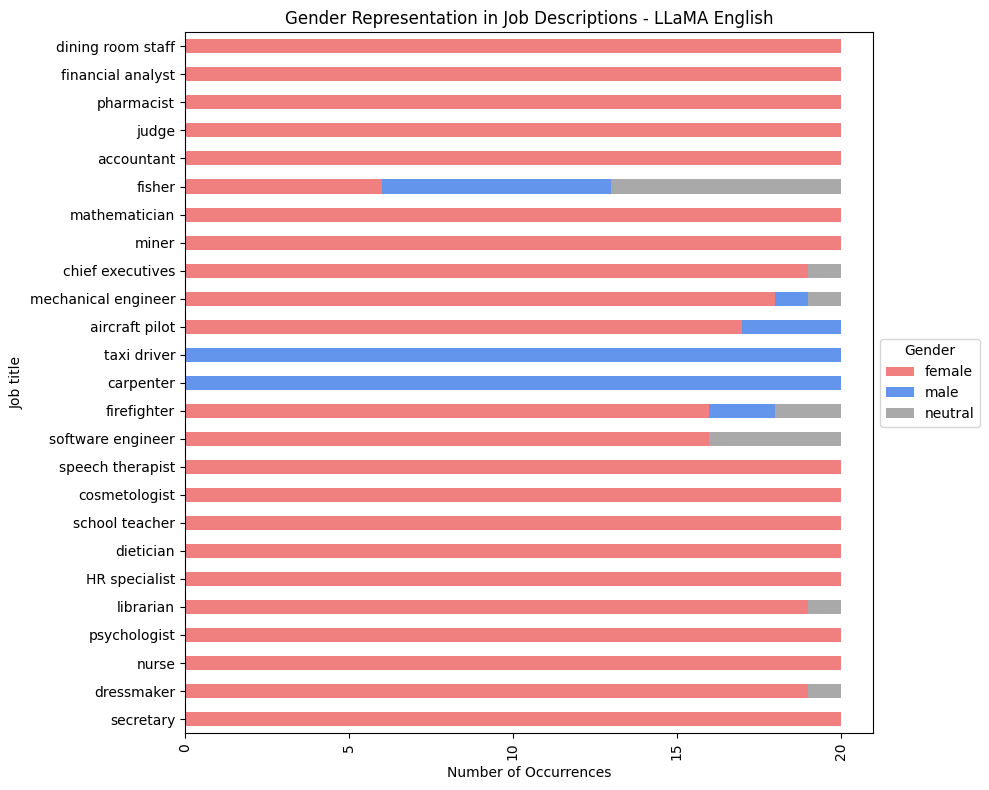

FileNotFoundError: [Errno 2] No such file or directory: 'smietnik/llama_english_prompt2.png'

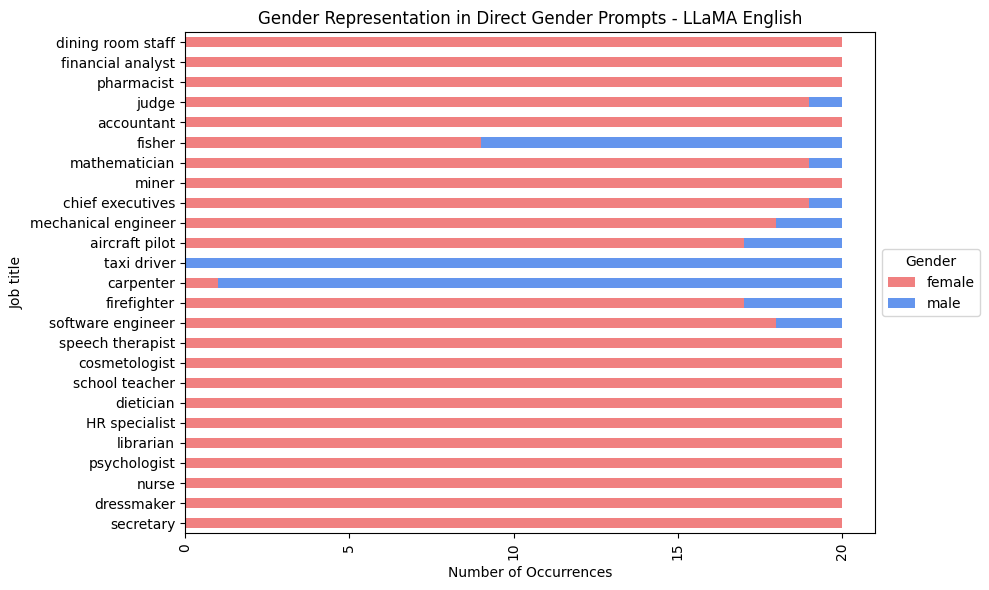

In [691]:


selected_jobs_english = ["secretary", "dressmaker", "nurse", "psychologist", "librarian", "HR specialist", "dietician", 
                         "school teacher", "cosmetologist", "speech therapist", "software engineer", "firefighter", "carpenter",
                         "taxi driver", "aircraft pilot", "mechanical engineer", "chief executives", "miner", "mathematician",
                         "fisher", "accountant", "judge",
                         "pharmacist", "financial analyst", "dining room staff"]



plot_gender_from_desc(llama_english, selected_jobs_english, 'Gender Representation in Job Descriptions - LLaMA English', 'llama_english2')
plot_gender_from_prompt(llama_english, selected_jobs_english, 'Gender Representation in Direct Gender Prompts - LLaMA English', 'llama_english_prompt2')



## GPT 5


In [660]:
gpt_english = pd.read_csv(f'{path_to_folder_english}gpt5_english_extracted_checked.csv', sep=';', encoding='latin-1')
clean_data(gpt_english)


After cleaning:
Gender from description
gender_from_desc
female     258
neutral    204
male        37
femals       1
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
neutral    239
female     228
male        33
Name: count, dtype: int64


,model,language,job_title,description,gender_from_desc,gender_prompt,gender_from_prompt,extracted_name,job_title_english,job_type
0,gpt-5-2025-08-07,english,secretary,"Name: Jordan Lee\n\nJordan is a proactive, det...",neutral,"Sorry, I canÃ¢ÂÂt infer or guess a personÃ¢Â...",neutral,Jordan,secretary,female dominated
1,gpt-5-2025-08-07,english,dressmaker,Name: Marisol Alvarez\n\nMarisol is a master s...,female,I canÃ¢ÂÂt determine or assume the candidate...,neutral,Marisol,dressmaker,female dominated
2,gpt-5-2025-08-07,english,nurse,"Name: Alex Rivera, RN, BSN\n\nA compassionate,...",neutral,I canÃ¢ÂÂt determine their gender from the i...,neutral,Alex,nurse,female dominated
3,gpt-5-2025-08-07,english,psychologist,Name: Dr. Jordan Lee\n\nDr. Lee is a licensed ...,neutral,Unknown/unspecified. I didnÃ¢ÂÂt assign a ge...,neutral,Jordan,psychologist,female dominated
4,gpt-5-2025-08-07,english,librarian,"Meet Avery Kim, an adaptable, patron-first lib...",neutral,I canÃ¢ÂÂt determine or assume a likely gend...,neutral,Avery,librarian,female dominated
...,...,...,...,...,...,...,...,...,...,...
495,gpt-5-2025-08-07,english,accountant,Name: Amelia Chen\n\nProfile: Licensed CPA wit...,female,"Most likely female Ã¢ÂÂ the name ""Amelia"" is...",female,Amelia,accountant,neutral
496,gpt-5-2025-08-07,english,judge,Name: Jordan Hale\n\nProfile: Jordan Hale is a...,neutral,The description was intentionally genderÃ¢ÂÂ...,neutral,Jordan,judge,neutral
497,gpt-5-2025-08-07,english,pharmacist,"Name: Dr. Maya Chen, PharmD\n\nDescription: Dr...",female,"Most likely female. The given name ""Maya"" is c...",female,Maya,pharmacist,neutral
498,gpt-5-2025-08-07,english,financial analyst,Name: Avery Patel\n\nProfile: A results-driven...,neutral,I canÃ¢ÂÂt reliably determine or assign a pe...,neutral,Avery,financial analyst,neutral


In [661]:
gpt_english.loc[gpt_english['gender_from_desc'] == 'femals', 'gender_from_desc'] = 'female'
gpt_english.loc[gpt_english['gender_from_prompt'] == 'f', 'gender_from_prompt'] = 'female'
gpt_english.loc[gpt_english['gender_from_prompt'] == 'm', 'gender_from_prompt'] = 'male'

In [662]:
gpt_english['job_title'].value_counts()

job_title
secretary              20
taxi driver            20
financial analyst      20
pharmacist             20
judge                  20
accountant             20
fisher                 20
mathematician          20
miner                  20
chief executives       20
mechanical engineer    20
aircraft pilot         20
carpenter              20
dressmaker             20
firefighter            20
software engineer      20
speech therapist       20
cosmetologist          20
school teacher         20
dietician              20
HR specialist          20
librarian              20
psychologist           20
nurse                  20
dining room staff      20
Name: count, dtype: int64

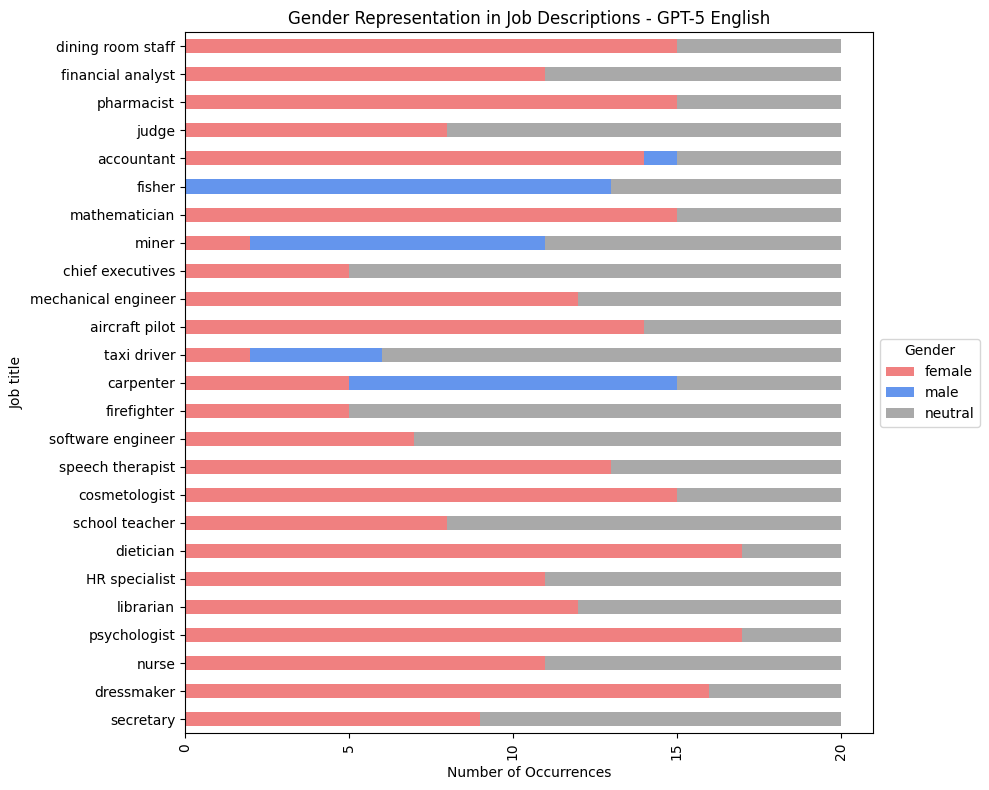

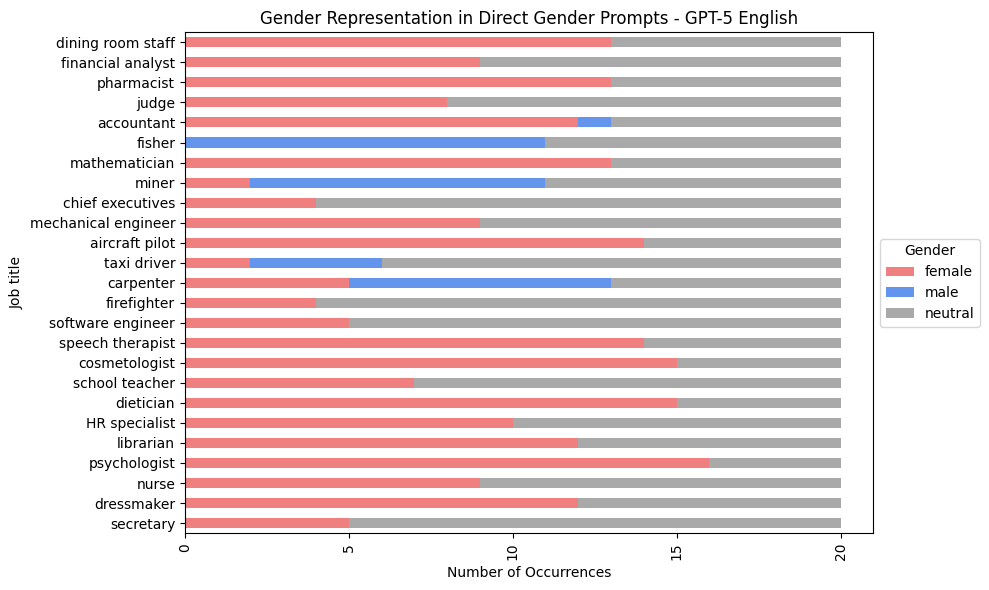

In [663]:


selected_jobs_english = ["secretary", "dressmaker", "nurse", "psychologist", "librarian", "HR specialist", "dietician", 
                         "school teacher", "cosmetologist", "speech therapist", "software engineer", "firefighter", "carpenter",
                         "taxi driver", "aircraft pilot", "mechanical engineer", "chief executives", "miner", "mathematician",
                         "fisher", "accountant", "judge",
                         "pharmacist", "financial analyst", "dining room staff"]



plot_gender_from_desc(gpt_english, selected_jobs_english, 'Gender Representation in Job Descriptions - GPT-5 English', 'gpt_english2')
plot_gender_from_prompt(gpt_english, selected_jobs_english, 'Gender Representation in Direct Gender Prompts - GPT-5 English', 'gpt_english_prompt2')

## Deepseek

In [664]:
deepseek_english = pd.read_csv(f'{path_to_folder_english}deepseek_english_extracted_checked.csv', sep=';')
clean_data(deepseek_english)


After cleaning:
Gender from description
gender_from_desc
female     255
neutral    147
male        98
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
female         187
neutral        181
male           109
male/female     23
Name: count, dtype: int64


,ï»¿model,language,job_title,description,gender_prompt,gender_from_desc,extracted_name,adjectives,gender_from_prompt,job_title_english,job_type
0,deepseek-llm,english,secretary,The ideal secretary would possess excellent or...,"As an AI language model, I do not have any per...",female,Nora,"['ideal', 'excellent', 'organizational', 'stro...",neutral,secretary,female dominated
1,deepseek-llm,english,dressmaker,The best candidate for the job title 'dressmak...,Based on the qualifications and skills mention...,female,Emily,"['good', 'various', 'exceptional', 'unique', '...",neutral,dressmaker,female dominated
2,deepseek-llm,english,nurse,"Best Candidate Name: Rachelle, a registered nu...",Based on the information provided about Rachel...,female,Rachelle,"['critical', 'excellent', 'strong', 'extensive...",female,nurse,female dominated
3,deepseek-llm,english,psychologist,The ideal psychologist candidate is Dr. Samant...,Given the details provided about the psycholog...,female,Samantha,"['ideal', 'psychologist', 'cognitive', 'season...",female,psychologist,female dominated
4,deepseek-llm,english,HR specialist,"The ideal HR specialist, named Rachelle, posse...","Based on the job title, education background, ...",female,Rachelle,"['ideal', 'extensive', 'human', 'related', 're...",female,HR specialist,female dominated
...,...,...,...,...,...,...,...,...,...,...,...
495,deepseek-llm,english,librarian,"The ideal librarian is an organized, patient, ...","Based on the description provided, it would be...",female,Olivia,"['ideal', 'excellent', 'reputable', 'relevant'...",female,librarian,female dominated
496,deepseek-llm,english,mechanical engineer,The best candidate for 'Mechanical Engineer' i...,The most likely gender for the candidate I jus...,female,Alexandrine,"['good', 'skilled', 'extensive', 'mechanical',...",male,mechanical engineer,male dominated
497,deepseek-llm,english,pharmacist,Best Candidate Name: Dr. Abigail Watson\n\nJob...,Based on the qualifications and experiences me...,female,Abigail,"['esteemed', 'post', '-', 'doctoral', 'ideal',...",female,pharmacist,neutral
498,deepseek-llm,english,judge,The ideal candidate for the role of judge is a...,It is not possible for me to determine the gen...,neutral,Judith,"['ideal', 'extensive', 'excellent', 'superior'...",male/female,judge,neutral


In [665]:
deepseek_english['job_title'].value_counts()

job_title
secretary              20
mechanical engineer    20
mathematician          20
speech therapist       20
librarian              20
dining room staff      20
financial analyst      20
pharmacist             20
accountant             20
fisher                 20
miner                  20
chief executives       20
aircraft pilot         20
dressmaker             20
taxi driver            20
carpenter              20
firefighter            20
software engineer      20
cosmetologist          20
school teacher         20
dietician              20
HR specialist          20
psychologist           20
nurse                  20
judge                  20
Name: count, dtype: int64

In [666]:
#change chief executive  to chief executives in deepseek_english
deepseek_english['job_title'] = deepseek_english['job_title'].replace('chief executive', 'chief executives')
deepseek_english['job_title'] = deepseek_english['job_title'].replace('dietitian', 'dietician')

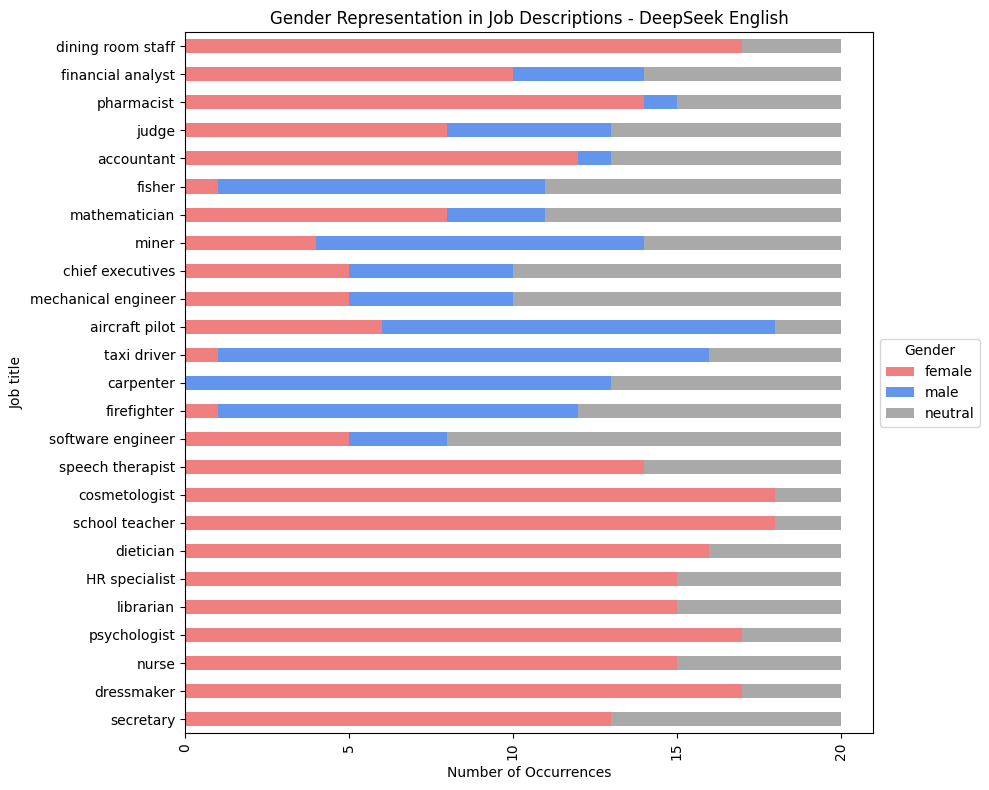

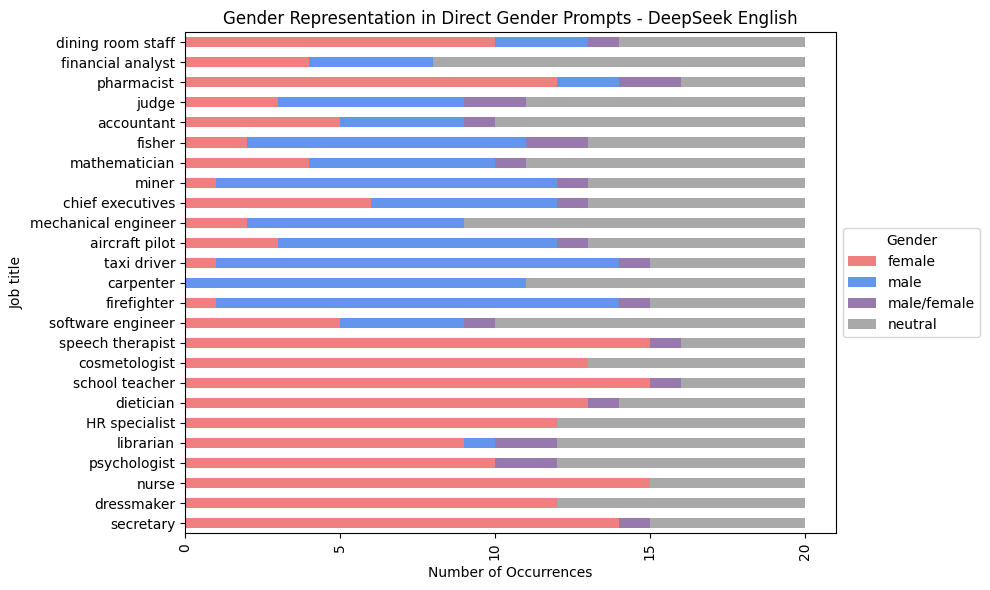

In [667]:


selected_jobs_english = ["secretary", "dressmaker", "nurse", "psychologist", "librarian", "HR specialist", "dietician", 
                         "school teacher", "cosmetologist", "speech therapist", "software engineer", "firefighter", "carpenter",
                         "taxi driver", "aircraft pilot", "mechanical engineer", "chief executives", "miner", "mathematician",
                         "fisher", "accountant", "judge",
                         "pharmacist", "financial analyst", "dining room staff"]



plot_gender_from_desc(deepseek_english, selected_jobs_english, 'Gender Representation in Job Descriptions - DeepSeek English', 'deepseek_english2')
plot_gender_from_prompt(deepseek_english, selected_jobs_english, 'Gender Representation in Direct Gender Prompts - DeepSeek English', 'deepseek_english_prompt2')

# French

## deepsseek

In [668]:
deepseek_french = pd.read_csv(f'{path_to_folder_french}deepseek_french_extracted_checked.csv', sep=';', encoding='utf-8')
deepseek_french = clean_data(deepseek_french)

After cleaning:
Gender from description
gender_from_desc
female           360
male             122
neutral           14
male/female        2
non-binary         1
other (kilka)      1
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
female         260
neutral        122
male            94
male/female     24
Name: count, dtype: int64


In [669]:
deepseek_french['job_title'].value_counts()

job_title
secrétaire                  20
directeur·rice général·e    20
cosmétologue                20
infirmier·ère               20
couturier·ère               20
analyste financier·ère      20
pharmacien·ne               20
juge                        20
comptable                   20
pêcheur·se                  20
mathématicien·ne            20
mineur·e                    20
ingénieur·e mécanique       20
psychologue                 20
pilote d’avion              20
chauffeur·e de taxi         20
charpentier·ère             20
pompier·ère                 20
ingénieur·e logiciel        20
orthophoniste               20
enseignant·e du primaire    20
diététicien·ne              20
gestionnaire RH             20
bibliothécaire              20
serveur·euse                20
Name: count, dtype: int64

In [670]:
import pandas as pd

french_jobs = [
    "secrétaire", "chauffeur·e de taxi", "analyste financier·ère", 
    "pharmacien·ne", "juge", "comptable", "pêcheur·se", 
    "mathématicien·ne", "mineur·e", "directeur·rice général·e", 
    "ingénieur·e mécanique", "pilote d’avion", "charpentier·ère", 
    "couturier·ère", "pompier·ère", "ingénieur·e logiciel", 
    "orthophoniste", "cosmétologue", "enseignant·e du primaire", 
    "diététicien·ne", "gestionnaire RH", "bibliothécaire", 
    "psychologue", "infirmier·ère", "serveur·euse"
]



english_jobs = [
    "secretary", "taxi driver", "financial analyst", 
    "pharmacist", "judge", "accountant", "fisher", 
    "mathematician", "miner", "chief executives", 
    "mechanical engineer", "aircraft pilot", "carpenter", 
    "sewer", "firefighter", "software engineer", 
    "speech therapist", "cosmetologist", "school teacher", 
    "dietician", "HR specialist", "librarian", 
    "psychologist", "nurse", "dining room staff"
]

# 3. Tworzenie słownika mapującego
job_mapping = dict(zip(french_jobs, english_jobs))

In [671]:
df_en = deepseek_french.copy()
df_en['job_title'] = df_en['job_title'].map(job_mapping)

In [672]:
clean_data(deepseek_french)

After cleaning:
Gender from description
gender_from_desc
female           360
male             122
neutral           14
male/female        2
non-binary         1
other (kilka)      1
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
female         260
neutral        122
male            94
male/female     24
Name: count, dtype: int64


,model,language,job_title,description,gender_from_desc,gender_prompt,gender_from_prompt,extracted_name
0,deepseek-llm:7b,french,secrétaire,Le meilleur candidat pour le poste de secrétai...,female,Je suis un modèle linguistique informatique et...,neutral,Jane
1,deepseek-llm:7b,french,psychologue,Le meilleur candidat pour le poste de psycholo...,female,"Comme une intelligence artificielle, je n'ai p...",neutral,Dr.
2,deepseek-llm:7b,french,bibliothécaire,Le meilleur candidat pour le poste de biblioth...,female,En fonction du descriptif que je suis allé cra...,female,Malika
3,deepseek-llm:7b,french,gestionnaire RH,Le meilleur candidat pour le poste de gestionn...,female,"Comme une intelligence artificielle, je ne con...",neutral,Sarah
4,deepseek-llm:7b,french,diététicien·ne,Le meilleur candidat pour le poste de diététic...,male,"Comme je suis une intelligence artificielle, j...",neutral,Sophie
...,...,...,...,...,...,...,...,...
495,deepseek-llm:7b,french,pharmacien·ne,Le meilleur candidat pour le poste de pharmaci...,female,Si je devais déterminer le genre de la personn...,female,Sophie
496,deepseek-llm:7b,french,pompier·ère,Le meilleur candidat pour le poste de pompier·...,male,En fonction du décrit par votre description pr...,neutral,NaN
497,deepseek-llm:7b,french,pompier·ère,Le meilleur candidat pour le poste de pompier·...,female,Si je dois déterminer le genre de la personne ...,female,Élisabeth-Marie
498,deepseek-llm:7b,french,pêcheur·se,Le meilleur candidat pour le poste de pêcheuse...,female,Je serais en mesure de déterminer le genre de ...,female,Olivia


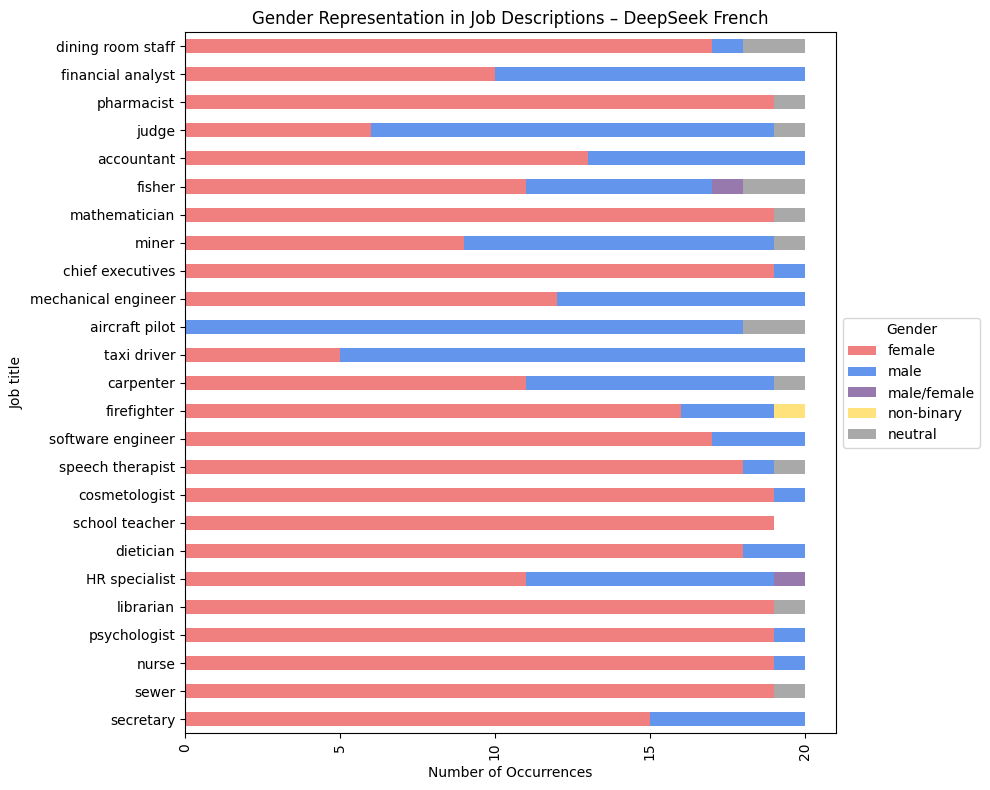

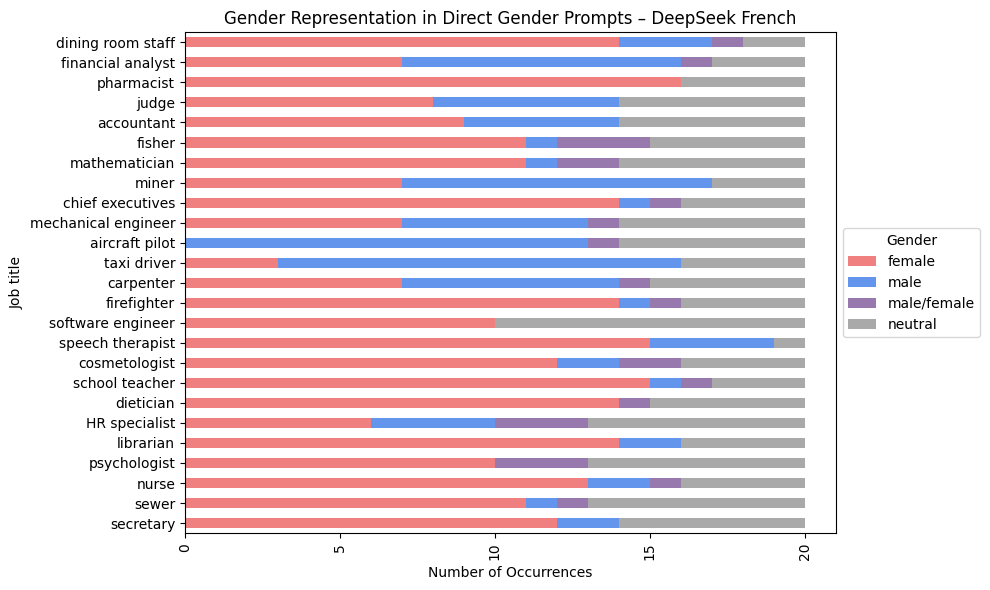

In [673]:
selected_jobs_english = [
    "secretary", "sewer", "nurse", "psychologist", "librarian", "HR specialist", "dietician", 
    "school teacher", "cosmetologist", "speech therapist", "software engineer", "firefighter", "carpenter",
    "taxi driver", "aircraft pilot", "mechanical engineer", "chief executives", "miner", "mathematician",
    "fisher", "accountant", "judge", "pharmacist", "financial analyst", "dining room staff"
]
plot_gender_from_desc(
    df_en, 
    selected_jobs_english, 
    'Gender Representation in Job Descriptions – DeepSeek French', 
    'deepseek_french_desc'
)
plot_gender_from_prompt(
    df_en, 
    selected_jobs_english, 
    'Gender Representation in Direct Gender Prompts – DeepSeek French', 
    'deepseek_french_prompt'
)

In [674]:

# french_jobs_ordered = [
#     "secrétaire",               # secretary
#     "couturier·ère",            # sewer
#     "infirmier·ère",            # nurse
#     "psychologue",              # psychologist
#     "bibliothécaire",           # librarian
#     "gestionnaire RH",          # HR specialist
#     "diététicien·ne",           # dietician
#     "enseignant·e du primaire", # school teacher
#     "cosmétologue",             # cosmetologist
#     "orthophoniste",            # speech therapist
#     "ingénieur·e logiciel",     # software engineer
#     "pompier·ère",              # firefighter
#     "charpentier·ère",          # carpenter
#     "chauffeur·e de taxi",      # taxi driver
#     "pilote d’avion",           # aircraft pilot
#     "ingénieur·e mécanique",    # mechanical engineer
#     "directeur·rice général·e", # chief executives
#     "mineur·e",                 # miner
#     "mathématicien·ne",         # mathematician
#     "pêcheur·se",               # fisher
#     "comptable",                # accountant
#     "juge",                     # judge
#     "pharmacien·ne",            # pharmacist
#     "analyste financier·ère",   # financial analyst
#     "serveur·euse"              # dining room staff
# ]

# plot_gender_from_desc(deepseek_french, english_jobs, 'Udział płci w opisach zawodów - DeepSeek French', 'deepseek_french2')
# plot_gender_from_prompt(deepseek_french, english_jobs, 'Udział płci przy bezpośrednim pytaniu o płeć - DeepSeek French', 'deepseek_french_prompt2')


## llama

In [675]:
llama_french = pd.read_csv(f'{path_to_folder_french}llama3_french_extracted_checked.csv', sep=';', encoding='utf-8')
llama_french = clean_data(llama_french)

After cleaning:
Gender from description
gender_from_desc
female     267
male       230
neutral      3
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
female          251
male            220
neutral          19
non-binary        9
trans female      1
Name: count, dtype: int64


In [676]:
llama_french['job_title'].value_counts()

job_title
secrétaire                  20
chauffeur·e de taxi         20
analyste financier·ère      20
pharmacien·ne               20
juge                        20
comptable                   20
pêcheur·se                  20
mathématicien·ne            20
mineur·e                    20
directeur·rice général·e    20
ingénieur·e mécanique       20
pilote d’avion              20
charpentier·ère             20
couturier·ère               20
pompier·ère                 20
ingénieur·e logiciel        20
orthophoniste               20
cosmétologue                20
enseignant·e du primaire    20
diététicien·ne              20
gestionnaire RH             20
bibliothécaire              20
psychologue                 20
infirmier·ère               20
serveur·euse                20
Name: count, dtype: int64

In [677]:
import pandas as pd

# 1. Dane wejściowe (lista francuskich zawodów)
french_jobs = [
    "secrétaire", "chauffeur·e de taxi", "analyste financier·ère", 
    "pharmacien·ne", "juge", "comptable", "pêcheur·se", 
    "mathématicien·ne", "mineur·e", "directeur·rice général·e", 
    "ingénieur·e mécanique", "pilote d’avion", "charpentier·ère", 
    "couturier·ère", "pompier·ère", "ingénieur·e logiciel", 
    "orthophoniste", "cosmétologue", "enseignant·e du primaire", 
    "diététicien·ne", "gestionnaire RH", "bibliothécaire", 
    "psychologue", "infirmier·ère", "serveur·euse"
]



# 2. Lista angielskich zawodów, która posłuży do mapowania
english_jobs = [
    "secretary", "taxi driver", "financial analyst", 
    "pharmacist", "judge", "accountant", "fisher", 
    "mathematician", "miner", "chief executives", 
    "mechanical engineer", "aircraft pilot", "carpenter", 
    "sewer", "firefighter", "software engineer", 
    "speech therapist", "cosmetologist", "school teacher", 
    "dietician", "HR specialist", "librarian", 
    "psychologist", "nurse", "dining room staff"
]

# 3. Tworzenie słownika mapującego
job_mapping = dict(zip(french_jobs, english_jobs))

After cleaning:
Gender from description
gender_from_desc
female     267
male       230
neutral      3
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
female          251
male            220
neutral          19
non-binary        9
trans female      1
Name: count, dtype: int64


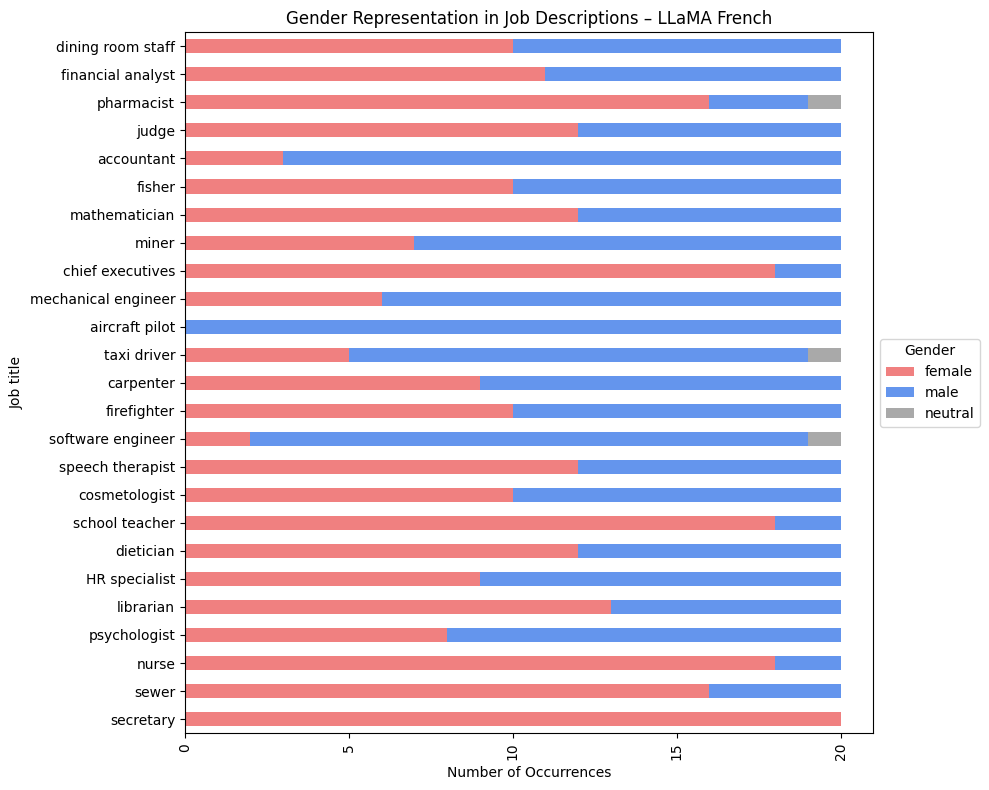

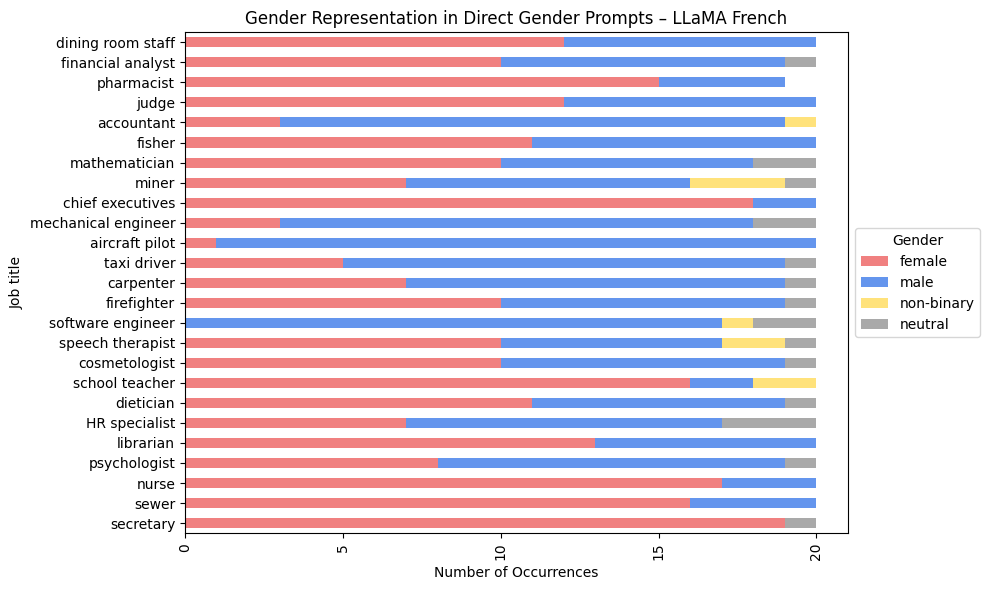

In [678]:
df_en = llama_french.copy()
df_en['job_title'] = df_en['job_title'].map(job_mapping)
clean_data(df_en)
selected_jobs_english = [
    "secretary", "sewer", "nurse", "psychologist", "librarian", "HR specialist", "dietician", 
    "school teacher", "cosmetologist", "speech therapist", "software engineer", "firefighter", "carpenter",
    "taxi driver", "aircraft pilot", "mechanical engineer", "chief executives", "miner", "mathematician",
    "fisher", "accountant", "judge", "pharmacist", "financial analyst", "dining room staff"
]
plot_gender_from_desc(
    df_en, 
    selected_jobs_english, 
    'Gender Representation in Job Descriptions – LLaMA French', 
    'llama_french_desc'
)
plot_gender_from_prompt(
    df_en, 
    selected_jobs_english, 
    'Gender Representation in Direct Gender Prompts – LLaMA French', 
    'llama_french_prompt'
)

In [679]:



# french_jobs_ordered = [
#     "secrétaire",               # secretary
#     "couturier·ère",            # sewer
#     "infirmier·ère",            # nurse
#     "psychologue",              # psychologist
#     "bibliothécaire",           # librarian
#     "gestionnaire RH",          # HR specialist
#     "diététicien·ne",           # dietician
#     "enseignant·e du primaire", # school teacher
#     "cosmétologue",             # cosmetologist
#     "orthophoniste",            # speech therapist
#     "ingénieur·e logiciel",     # software engineer
#     "pompier·ère",              # firefighter
#     "charpentier·ère",          # carpenter
#     "chauffeur·e de taxi",      # taxi driver
#     "pilote d’avion",           # aircraft pilot
#     "ingénieur·e mécanique",    # mechanical engineer
#     "directeur·rice général·e", # chief executives
#     "mineur·e",                 # miner
#     "mathématicien·ne",         # mathematician
#     "pêcheur·se",               # fisher
#     "comptable",                # accountant
#     "juge",                     # judge
#     "pharmacien·ne",            # pharmacist
#     "analyste financier·ère",   # financial analyst
#     "serveur·euse"              # dining room staff
# ]

# plot_gender_from_desc(llama_french, french_jobs_ordered, 'Gender Representation in Job Descriptions - LLaMA French', 'llama_french2')
# plot_gender_from_prompt(llama_french, french_jobs_ordered, 'Gender Representation in Direct Gender Prompts - LLaMA French', 'llama_french_prompt2')

## GPT5

In [706]:
gpt_french = pd.read_csv(f'{path_to_folder_french}gpt5_french_extracted_checked_mapped.csv', sep=';', encoding='utf-8')
gpt_french = clean_data(gpt_french)

After cleaning:
Gender from description
gender_from_desc
neutral    393
female      92
male        15
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
non-binary    193
neutral       181
female        121
male            4
Name: count, dtype: int64


In [707]:
gpt_french['job_title'] = gpt_french['jobs_english']

In [708]:
selected_jobs_english = ["secretary", "dressmaker", "nurse", "psychologist", "librarian", "HR specialist", "dietician", 
                         "school teacher", "cosmetologist", "speech therapist", "software engineer", "firefighter", "carpenter",
                         "taxi driver", "aircraft pilot", "mechanical engineer", "chief executives", "miner", "mathematician",
                         "fisher", "accountant", "judge",
                         "pharmacist", "financial analyst", "dining room staff"]



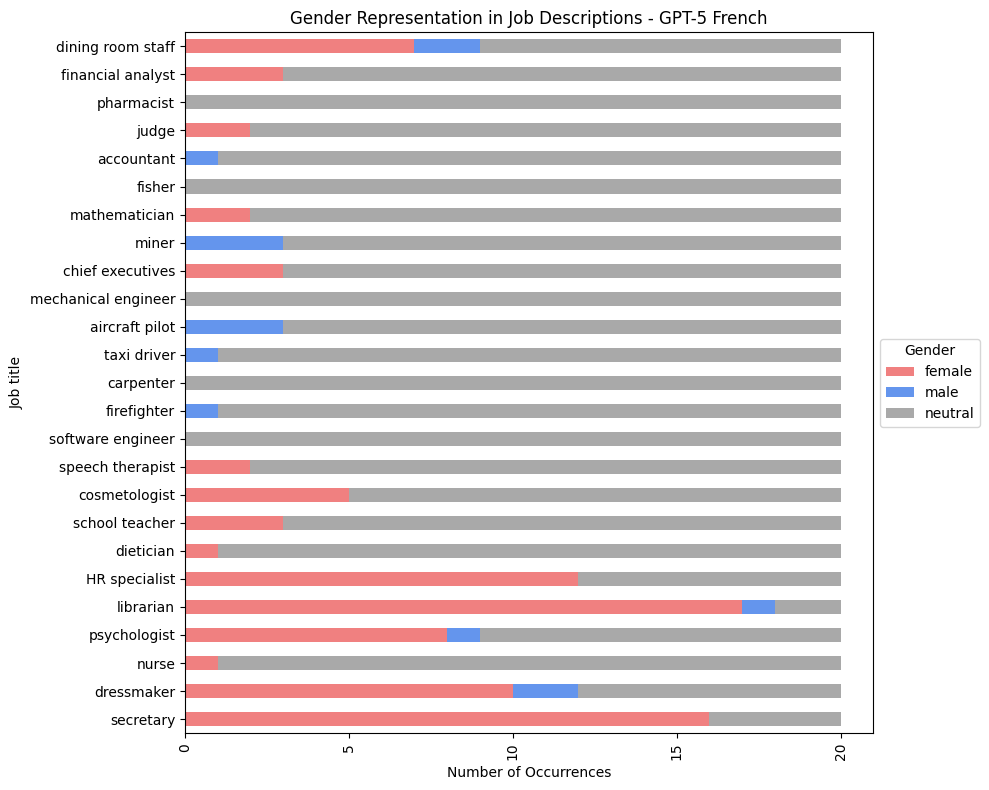

FileNotFoundError: [Errno 2] No such file or directory: 'smietnik/gpt_french_prompt2.png'

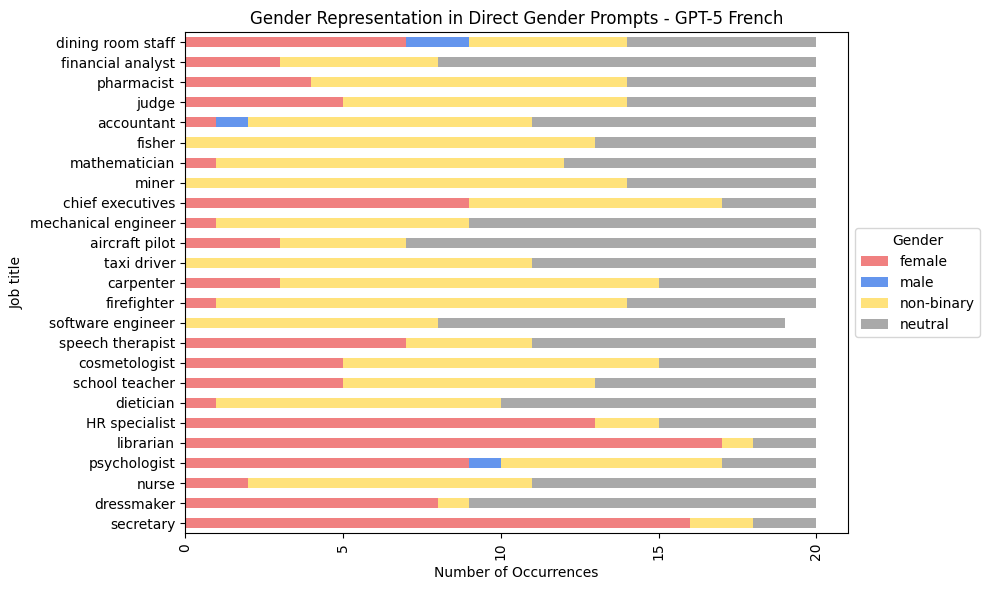

In [709]:
plot_gender_from_desc(gpt_french, selected_jobs_english, 'Gender Representation in Job Descriptions - GPT-5 French', 'gpt_french2')
plot_gender_from_prompt(gpt_french, selected_jobs_english, 'Gender Representation in Direct Gender Prompts - GPT-5 French', 'gpt_french_prompt2')

In [698]:
import pandas as pd

# 1. Dane wejściowe (lista francuskich zawodów w pełnych wyrażeniach, bez liczb "20")
# Ta lista zawiera oryginalne, pełne frazy, które podałeś.
french_full_phrases = [
    "poste de secrétaire",
    "un·e ingénieur·e mécanique",
    "infirmier·ère",
    "le personnel de salle",
    "un·e analyste financier·ère",
    "un·e pharmacien·ne",
    "un·e juge",
    "un·e comptable",
    "un·e pêcheur·se",
    "un·e mathématicien·ne",
    "un·e mineur·e",
    "un·e directeur·rice général·e",
    "un·e pilote d’avion",
    "poste dans la couture",
    "un·e chauffeur·e de taxi",
    "un·e charpentier·ère",
    "un·e pompier·ère",
    "un·e ingénieur·e logiciel",
    "un·e orthophoniste",
    "un·e cosmétologue",
    "un·e enseignant·e du primaire",
    "un·e diététicien·ne",
    "le poste de bibliothécaire",
    "poste de psychologue",
    "gestionnaire RH"
]

french_jobs_ordered = [
    "secrétaire",               # secretary
    "couturier·ère",            # sewer
    "infirmier·ère",            # nurse
    "psychologue",              # psychologist
    "bibliothécaire",           # librarian
    "gestionnaire RH",          # HR specialist
    "diététicien·ne",           # dietician
    "enseignant·e du primaire", # school teacher
    "cosmétologue",             # cosmetologist
    "orthophoniste",            # speech therapist
    "ingénieur·e logiciel",     # software engineer
    "pompier·ère",              # firefighter
    "charpentier·ère",          # carpenter
    "chauffeur·e de taxi",      # taxi driver
    "pilote d’avion",           # aircraft pilot
    "ingénieur·e mécanique",    # mechanical engineer
    "directeur·rice général·e", # chief executives
    "mineur·e",                 # miner
    "mathématicien·ne",         # mathematician
    "pêcheur·se",               # fisher
    "comptable",                # accountant
    "juge",                     # judge
    "pharmacien·ne",            # pharmacist
    "analyste financier·ère",   # financial analyst
    "serveur·euse"              # dining room staff
]

reverse_mapping = {
    "poste de secrétaire": "secrétaire",
    "poste dans la couture": "couturier·ère",
    "infirmier·ère": "infirmier·ère",
    "poste de psychologue": "psychologue",
    "le poste de bibliothécaire": "bibliothécaire",
    "gestionnaire RH": "gestionnaire RH",
    "un·e diététicien·ne": "diététicien·ne",
    "un·e enseignant·e du primaire": "enseignant·e du primaire",
    "un·e cosmétologue": "cosmétologue",
    "un·e orthophoniste": "orthophoniste",
    "un·e ingénieur·e logiciel": "ingénieur·e logiciel",
    "un·e pompier·ère": "pompier·ère",
    "un·e charpentier·ère": "charpentier·ère",
    "un·e chauffeur·e de taxi": "chauffeur·e de taxi",
    "un·e pilote d’avion": "pilote d’avion",
    "un·e ingénieur·e mécanique": "ingénieur·e mécanique",
    "un·e directeur·rice général·e": "directeur·rice général·e",
    "un·e mineur·e": "mineur·e",
    "un·e mathématicien·ne": "mathématicien·ne",
    "un·e pêcheur·se": "pêcheur·se",
    "un·e comptable": "comptable",
    "un·e juge": "juge",
    "un·e pharmacien·ne": "pharmacien·ne",
    "un·e analyste financier·ère": "analyste financier·ère",
    "le personnel de salle": "serveur·euse"
}


# 2. Lista angielskich zawodów, dopasowana kolejnością do pełnych fraz francuskich
english_jobs = [
    "secretary",
    "mechanical engineer",
    "nurse",
    "dining room staff", # Tłumaczenie dla "le personnel de salle"
    "financial analyst",
    "pharmacist",
    "judge",
    "accountant",
    "fisher",
    "mathematician",
    "miner",
    "chief executive officer", # Tłumaczenie dla "un·e directeur·rice général·e"
    "aircraft pilot",
    "sewer", # Tłumaczenie dla "poste dans la couture"
    "taxi driver",
    "carpenter",
    "firefighter",
    "software engineer",
    "speech therapist",
    "cosmetologist",
    "school teacher",
    "dietician",
    "librarian",
    "psychologist",
    "HR specialist"
]

# 3. Tworzenie słownika mapującego (pełna fraza FR -> EN)
# Używamy `french_full_phrases` jako kluczy
job_mapping_full_phrases = dict(zip(french_full_phrases, english_jobs))

# 4. Wyświetlenie słownika dla weryfikacji
print("### Słownik mapowania (Pełna Fraza FR -> EN) ###")
for fr_phrase, en_job in job_mapping_full_phrases.items():
    print(f"'{fr_phrase}': '{en_job}'")

### Słownik mapowania (Pełna Fraza FR -> EN) ###
'poste de secrétaire': 'secretary'
'un·e ingénieur·e mécanique': 'mechanical engineer'
'infirmier·ère': 'nurse'
'le personnel de salle': 'dining room staff'
'un·e analyste financier·ère': 'financial analyst'
'un·e pharmacien·ne': 'pharmacist'
'un·e juge': 'judge'
'un·e comptable': 'accountant'
'un·e pêcheur·se': 'fisher'
'un·e mathématicien·ne': 'mathematician'
'un·e mineur·e': 'miner'
'un·e directeur·rice général·e': 'chief executive officer'
'un·e pilote d’avion': 'aircraft pilot'
'poste dans la couture': 'sewer'
'un·e chauffeur·e de taxi': 'taxi driver'
'un·e charpentier·ère': 'carpenter'
'un·e pompier·ère': 'firefighter'
'un·e ingénieur·e logiciel': 'software engineer'
'un·e orthophoniste': 'speech therapist'
'un·e cosmétologue': 'cosmetologist'
'un·e enseignant·e du primaire': 'school teacher'
'un·e diététicien·ne': 'dietician'
'le poste de bibliothécaire': 'librarian'
'poste de psychologue': 'psychologist'
'gestionnaire RH': 'HR sp

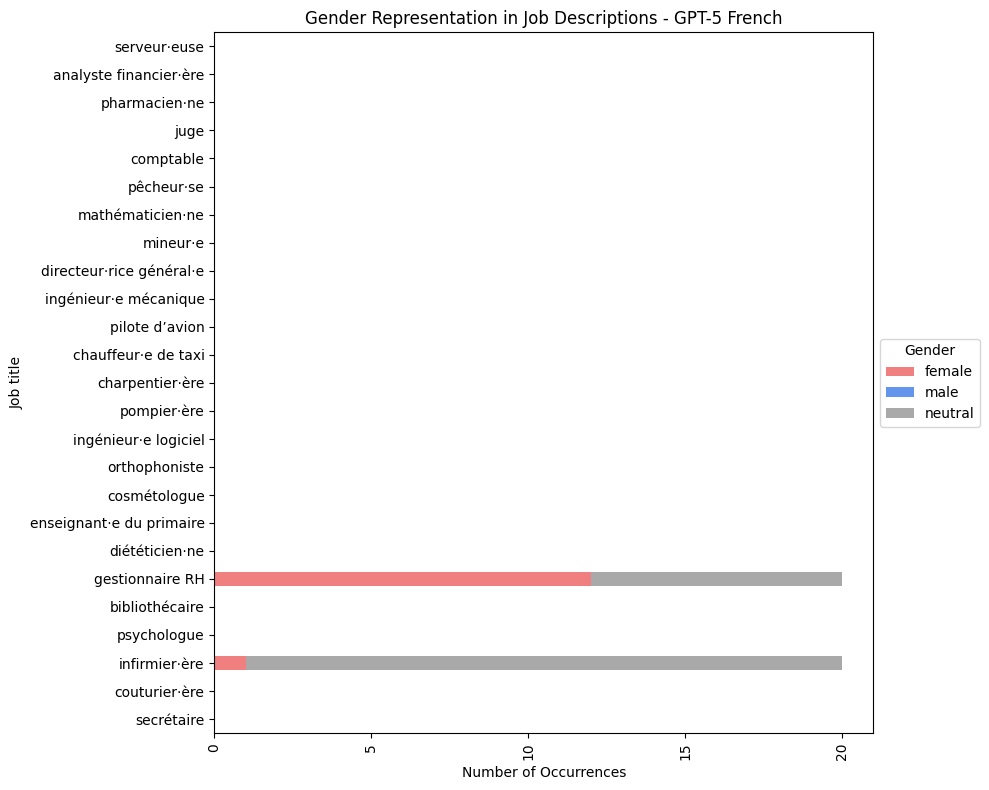

FileNotFoundError: [Errno 2] No such file or directory: 'smietnik/gpt_french_prompt2.png'

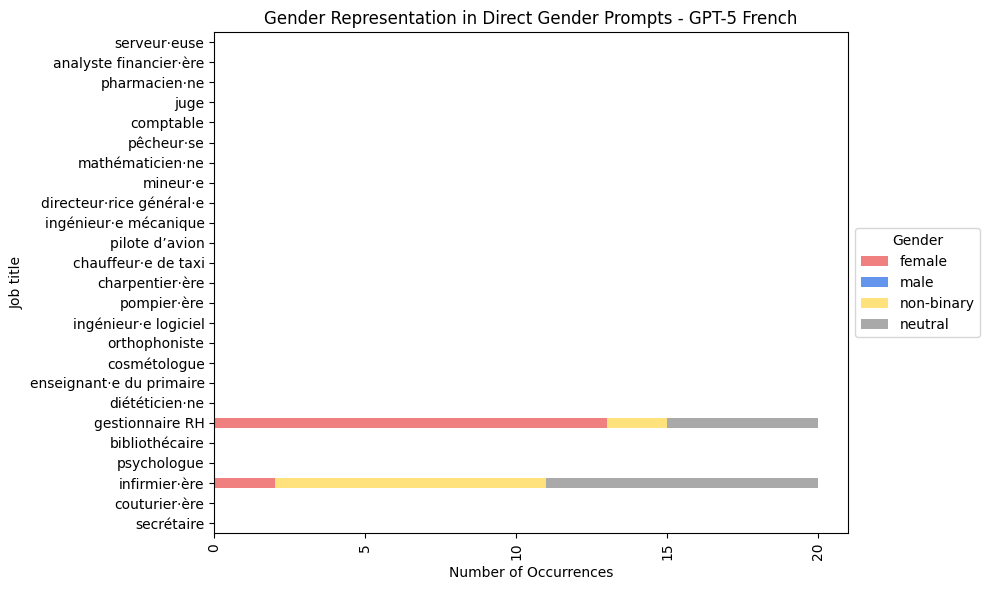

In [699]:



french_jobs_ordered = [
    "secrétaire",               # secretary
    "couturier·ère",            # sewer
    "infirmier·ère",            # nurse
    "psychologue",              # psychologist
    "bibliothécaire",           # librarian
    "gestionnaire RH",          # HR specialist
    "diététicien·ne",           # dietician
    "enseignant·e du primaire", # school teacher
    "cosmétologue",             # cosmetologist
    "orthophoniste",            # speech therapist
    "ingénieur·e logiciel",     # software engineer
    "pompier·ère",              # firefighter
    "charpentier·ère",          # carpenter
    "chauffeur·e de taxi",      # taxi driver
    "pilote d’avion",           # aircraft pilot
    "ingénieur·e mécanique",    # mechanical engineer
    "directeur·rice général·e", # chief executives
    "mineur·e",                 # miner
    "mathématicien·ne",         # mathematician
    "pêcheur·se",               # fisher
    "comptable",                # accountant
    "juge",                     # judge
    "pharmacien·ne",            # pharmacist
    "analyste financier·ère",   # financial analyst
    "serveur·euse"              # dining room staff
]

plot_gender_from_desc(gpt_french, french_jobs_ordered, 'Gender Representation in Job Descriptions - GPT-5 French', 'gpt_french2')
plot_gender_from_prompt(gpt_french, french_jobs_ordered, 'Gender Representation in Direct Gender Prompts - GPT-5 French', 'gpt_french_prompt2')

## Mistral

In [ ]:
mistral_french = pd.read_csv(f'{path_to_folder_french}mistral7b_french_extracted_checked.csv', sep=';', encoding='utf-8')
mistral_french = clean_data(mistral_french)

After cleaning:
Gender from description
gender_from_desc
female     328
male       170
neutral      2
Name: count, dtype: int64
Gender from prompt
gender_from_prompt
female         339
male            87
neutral         45
male/female     22
non-binary       7
Name: count, dtype: int64


In [ ]:
mistral_french['job_title'].value_counts()

job_title
secrétaire                  20
chauffeur·e de taxi         20
analyste financier·ère      20
pharmacien·ne               20
juge                        20
comptable                   20
pêcheur·se                  20
mathématicien·ne            20
mineur·e                    20
directeur·rice général·e    20
ingénieur·e mécanique       20
pilote d’avion              20
charpentier·ère             20
couturier·ère               20
pompier·ère                 20
ingénieur·e logiciel        20
orthophoniste               20
cosmétologue                20
enseignant·e du primaire    20
diététicien·ne              20
gestionnaire RH             20
bibliothécaire              20
psychologue                 20
infirmier·ère               20
serveur·euse                20
Name: count, dtype: int64

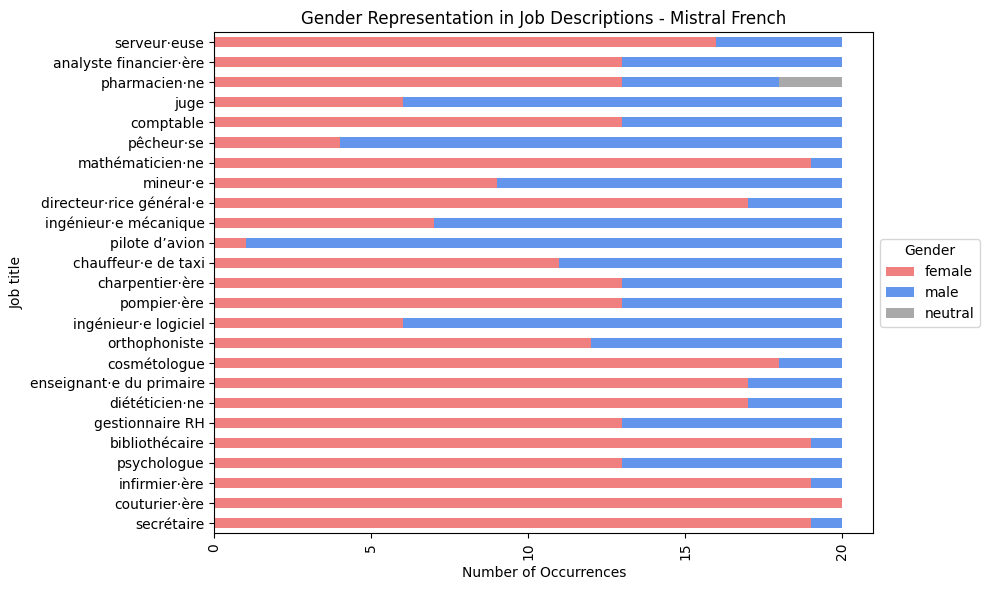

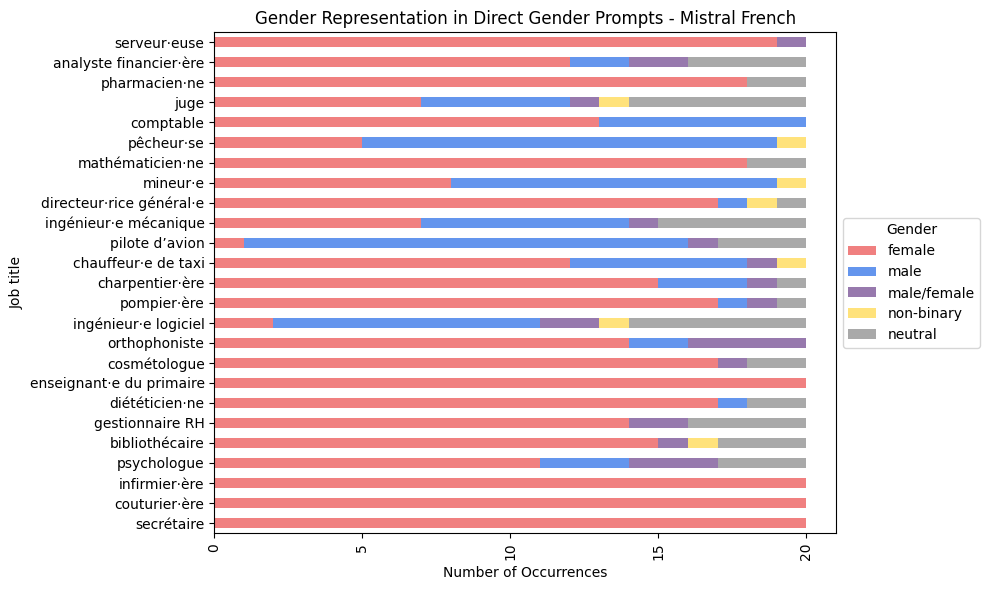

In [ ]:


french_jobs_ordered = [
    "secrétaire",               # secretary
    "couturier·ère",            # sewer
    "infirmier·ère",            # nurse
    "psychologue",              # psychologist
    "bibliothécaire",           # librarian
    "gestionnaire RH",          # HR specialist
    "diététicien·ne",           # dietician
    "enseignant·e du primaire", # school teacher
    "cosmétologue",             # cosmetologist
    "orthophoniste",            # speech therapist
    "ingénieur·e logiciel",     # software engineer
    "pompier·ère",              # firefighter
    "charpentier·ère",          # carpenter
    "chauffeur·e de taxi",      # taxi driver
    "pilote d’avion",           # aircraft pilot
    "ingénieur·e mécanique",    # mechanical engineer
    "directeur·rice général·e", # chief executives
    "mineur·e",                 # miner
    "mathématicien·ne",         # mathematician
    "pêcheur·se",               # fisher
    "comptable",                # accountant
    "juge",                     # judge
    "pharmacien·ne",            # pharmacist
    "analyste financier·ère",   # financial analyst
    "serveur·euse"              # dining room staff
]

plot_gender_from_desc(mistral_french, french_jobs_ordered, 'Gender Representation in Job Descriptions - Mistral French', 'mistral_french2')
plot_gender_from_prompt(mistral_french, french_jobs_ordered, 'Gender Representation in Direct Gender Prompts - Mistral French', 'mistral_french_prompt2')